In [638]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

## <span style="color:blue">Part 1: Dataset discovery:</span> 

In [639]:
df=pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [640]:
df.shape

(39644, 61)

In [641]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [642]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [643]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

## <span style="color:blue">Part 2: Data cleaning:</span> 

In [644]:
#We can see that there is a space before some columns name:
df.columns = df.columns.str.strip()
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [645]:
# Suppression de la colonne time delta et url
df.drop(columns=['timedelta','url'], inplace=True)

let's check if there are empty article

In [646]:
df[df['n_tokens_content']==0]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
893,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.550000,-0.500000,0.050000,0.500000,2500
917,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1700
1062,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,4500
1121,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.066667,0.033333,0.433333,0.033333,6800
1312,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.283333,0.266667,0.216667,0.266667,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39598,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,0.166667,0.250000,6100
39601,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.400000,0.125000,0.400000,2300
39613,12.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.000000,1600
39615,11.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.454545,0.136364,0.045455,0.136364,5700


and let's erase the 1181 rows

In [647]:
df = df[df['n_tokens_content']!=0]
df = df.reset_index(drop=True)

we can see that we have categorical values so let's transform these into a single columns with weekdays and channels

## <span style="color:blue">Part 3: Grouping of channels and publish day:</span> 

In [648]:
visu=df.copy()


In [649]:
#we create a columns publish_day with all the day
publish_day = visu.columns.values[list(visu.columns).index('weekday_is_monday'):list(visu.columns).index('weekday_is_sunday')+1]
#and now we create merge for each article values of weekday columns
merge = visu[publish_day]
days = [day[11:] for day in publish_day] 
temp=[]
for i in list(range(merge.shape[0])):
    for j in list(range(merge.shape[1])):
        if merge.iloc[i,j]==1:
            temp.append(days[j])
            
visu.insert(loc=11, column='publish_day', value=temp)
visu.drop(columns = publish_day, axis = 1, inplace=True)
visu['publish_day']

0           monday
1           monday
2           monday
3           monday
4           monday
           ...    
38458    wednesday
38459    wednesday
38460    wednesday
38461    wednesday
38462    wednesday
Name: publish_day, Length: 38463, dtype: object

### we are now doing the same thing for channel columns

In [650]:
channel=visu.columns.values[list(visu.columns).index('data_channel_is_lifestyle'):list(visu.columns).index('data_channel_is_world')+1]
merge_channel= visu[channel]
channels =['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World', 'Others']
temp2=[]
for i in list(range(merge_channel.shape[0])):
    if (((merge_channel.iloc[i,0])==0) and ((merge_channel.iloc[i,1])==0) and ((merge_channel.iloc[i,2])==0) and ((merge_channel.iloc[i,3])==0) and ((merge_channel.iloc[i,4])==0) and ((merge_channel.iloc[i,5])==0)):
        temp2.append(channels[len(channels)-1])
    for j in list(range(merge_channel.shape[1])):
        if merge_channel.iloc[i,j]==1:
            temp2.append(channels[j])

visu.insert(loc=12, column='topic', value=temp2)
visu.drop(columns = channel, axis = 1, inplace=True)
visu['topic']

0        Entertainment
1             Business
2             Business
3        Entertainment
4                 Tech
             ...      
38458             Tech
38459     Social Media
38460           Others
38461            World
38462    Entertainment
Name: topic, Length: 38463, dtype: object

## Let's see if there a outliers values on shares column

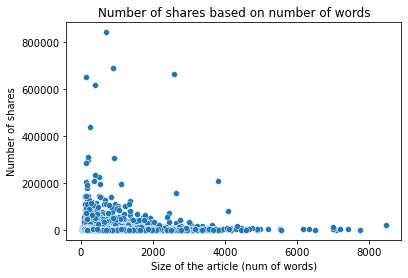

In [651]:
#n_tokens_content
ax = sns.scatterplot(x='n_tokens_content',y='shares', data=visu)
ax = ax.set(xlabel="Size of the article (num of words)", ylabel="Number of shares", title="Number of shares based on number of words")

we can see that there are outliers values so we will create a new columns in order to categorize the succeed of the article 

## <span style="color:blue">Part 4: Creation of the second target by categorizing the shares column:</span> 

In [652]:
print(df['shares'].describe())
Q1 = df['shares'].quantile(0.25)
Q3 = df['shares'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}")


df = df[(df['shares'] >= lower_bound) & (df['shares'] <= upper_bound)]
print(df.shape)
df['shares'].describe()


count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64
Lower Bound for Outliers: -13687.5
Upper Bound for Outliers: 25332.5
(37936, 59)


count    37936.000000
mean      2558.660138
std       3234.721771
min          1.000000
25%        940.000000
50%       1400.000000
75%       2700.000000
max      25300.000000
Name: shares, dtype: float64

## Here we are replacing in Visu the outliers value

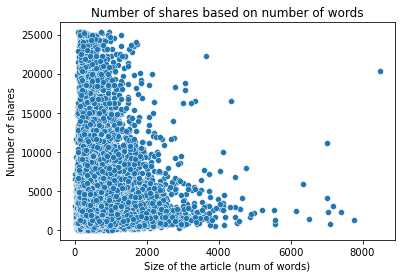

In [653]:
#n_tokens_content
visu = visu[(visu['shares'] >= lower_bound) & (visu['shares'] <= upper_bound)]
ax = sns.scatterplot(x='n_tokens_content',y='shares', data=visu)
ax = ax.set(xlabel="Size of the article (num of words)", ylabel="Number of shares", title="Number of shares based on number of words")

In [654]:
quantiles = df.shares.quantile([0.3, 0.7]).tolist()
print(quantiles)
labels = ['flop', 'mid', 'top']

# Replace the values in the dataset
for i in range(len(labels)):
    if i == 0:
        df.loc[df.shares <= quantiles[i], 'categorize'] = labels[i]
    elif i == len(labels) - 1:
        df.loc[df.shares > quantiles[i-1], 'categorize'] = labels[i]
    else:
        df.loc[(df.shares > quantiles[i-1]) & (df.shares <= quantiles[i]), 'categorize'] = labels[i]

# Display unique values in the 'categorize' column for each category
for i, label in enumerate(labels):
    print(i, ': ', label)
    print(df.loc[df.categorize == label, 'categorize'].unique())

df.categorize.unique()



[1000.0, 2200.0]
0 :  flop
['flop']
1 :  mid
['mid']
2 :  top
['top']


array(['flop', 'mid', 'top'], dtype=object)

### now we add this columns to visu dataset:

In [655]:
visu['categorize']=df['categorize']

## <span style="color:blue">Part 5: Visualisation :</span> 

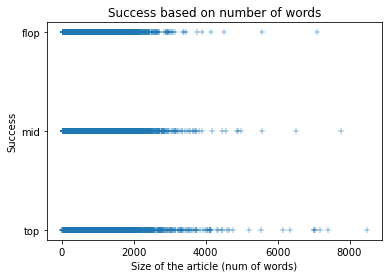

In [656]:
ax = sns.scatterplot(x='n_tokens_content', y='categorize', data=visu, marker='+')
ax = ax.set(xlabel="Size of the article (num of words)", ylabel="Success", title="Success based on number of words")

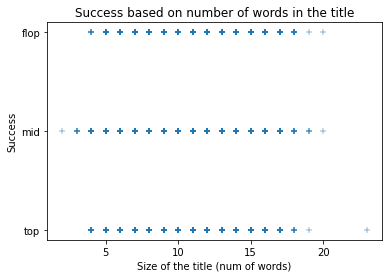

In [657]:
ax = sns.scatterplot(x='n_tokens_title', y='categorize', data=visu, marker='+')
ax = ax.set(xlabel="Size of the title (num of words)", ylabel="Success", title="Success based on number of words in the title")

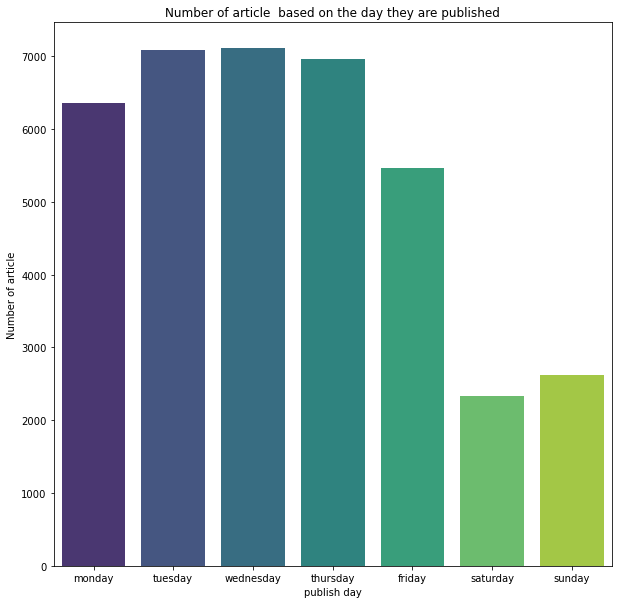

In [658]:
fig, axes = plt.subplots(figsize=(10,10))
ax = sns.countplot(x='publish_day',data=visu,alpha=1, ax=axes,palette='viridis')
ax = ax.set(xlabel='publish day', ylabel="Number of article", title="Number of article  based on the day they are published")


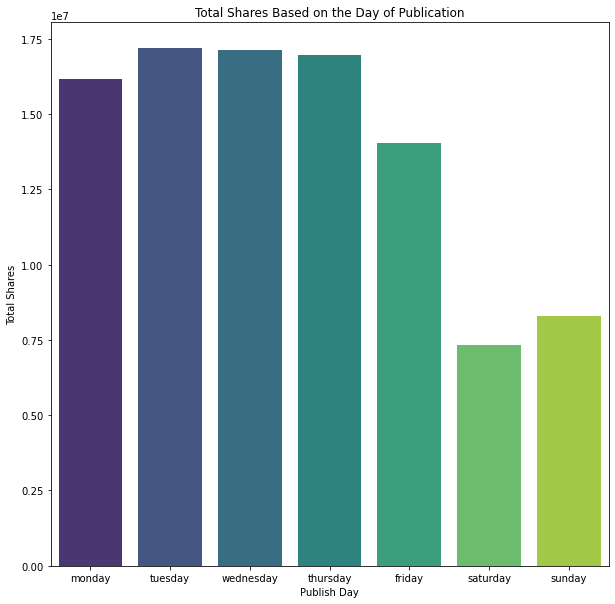

In [659]:
days_order = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday','sunday']

# Group by 'publish_day' and calculate the sum of shares for each day
shares_by_day = visu.groupby('publish_day')['shares'].sum().reindex(days_order).reset_index()

# Create the bar plot
fig, axes = plt.subplots(figsize=(10, 10))
ax = sns.barplot(x='publish_day', y='shares', data=shares_by_day, order=days_order, palette='viridis')

# Add labels and title
ax.set(xlabel='Publish Day', ylabel='Total Shares', title='Total Shares Based on the Day of Publication')

# Show the plot
plt.show()


## we can see that it's better to publish the article on the middle of the week even if the observation is not enough precise because it is not a rate

Text(0.5, 0.98, 'Number of shares based on the day they were published and their topic')

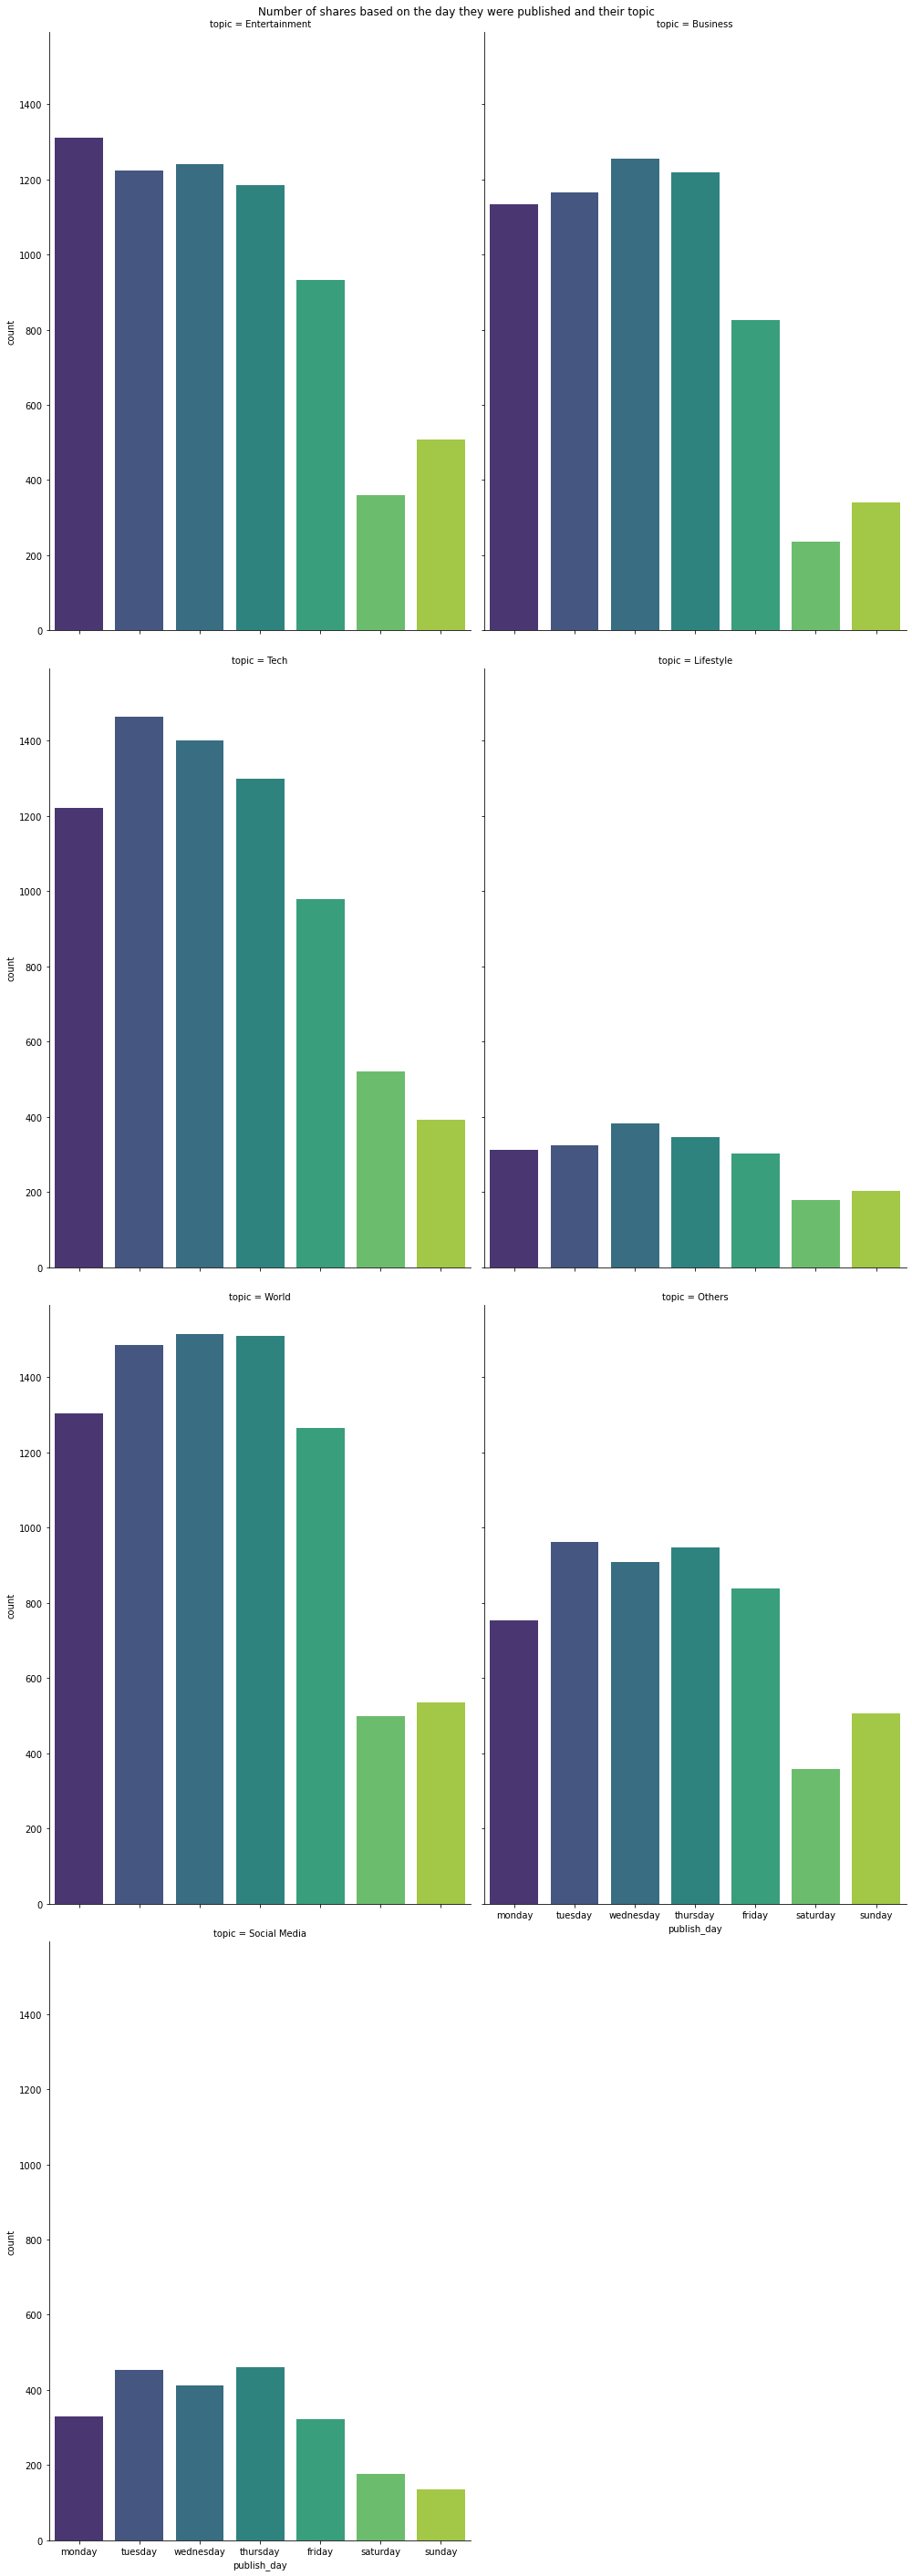

In [660]:

ax= sns.catplot(x='publish_day', col="topic", data=visu, kind="count", height=10, aspect=0.7, col_wrap=2,palette='viridis')
ax.fig.subplots_adjust(top=0.97)
ax.fig.suptitle("Number of shares based on the day they were published and their topic") 

## But here it is not representative enough because as we can see there are more articles published at the begining of the week so we can ponderate de number of article by day

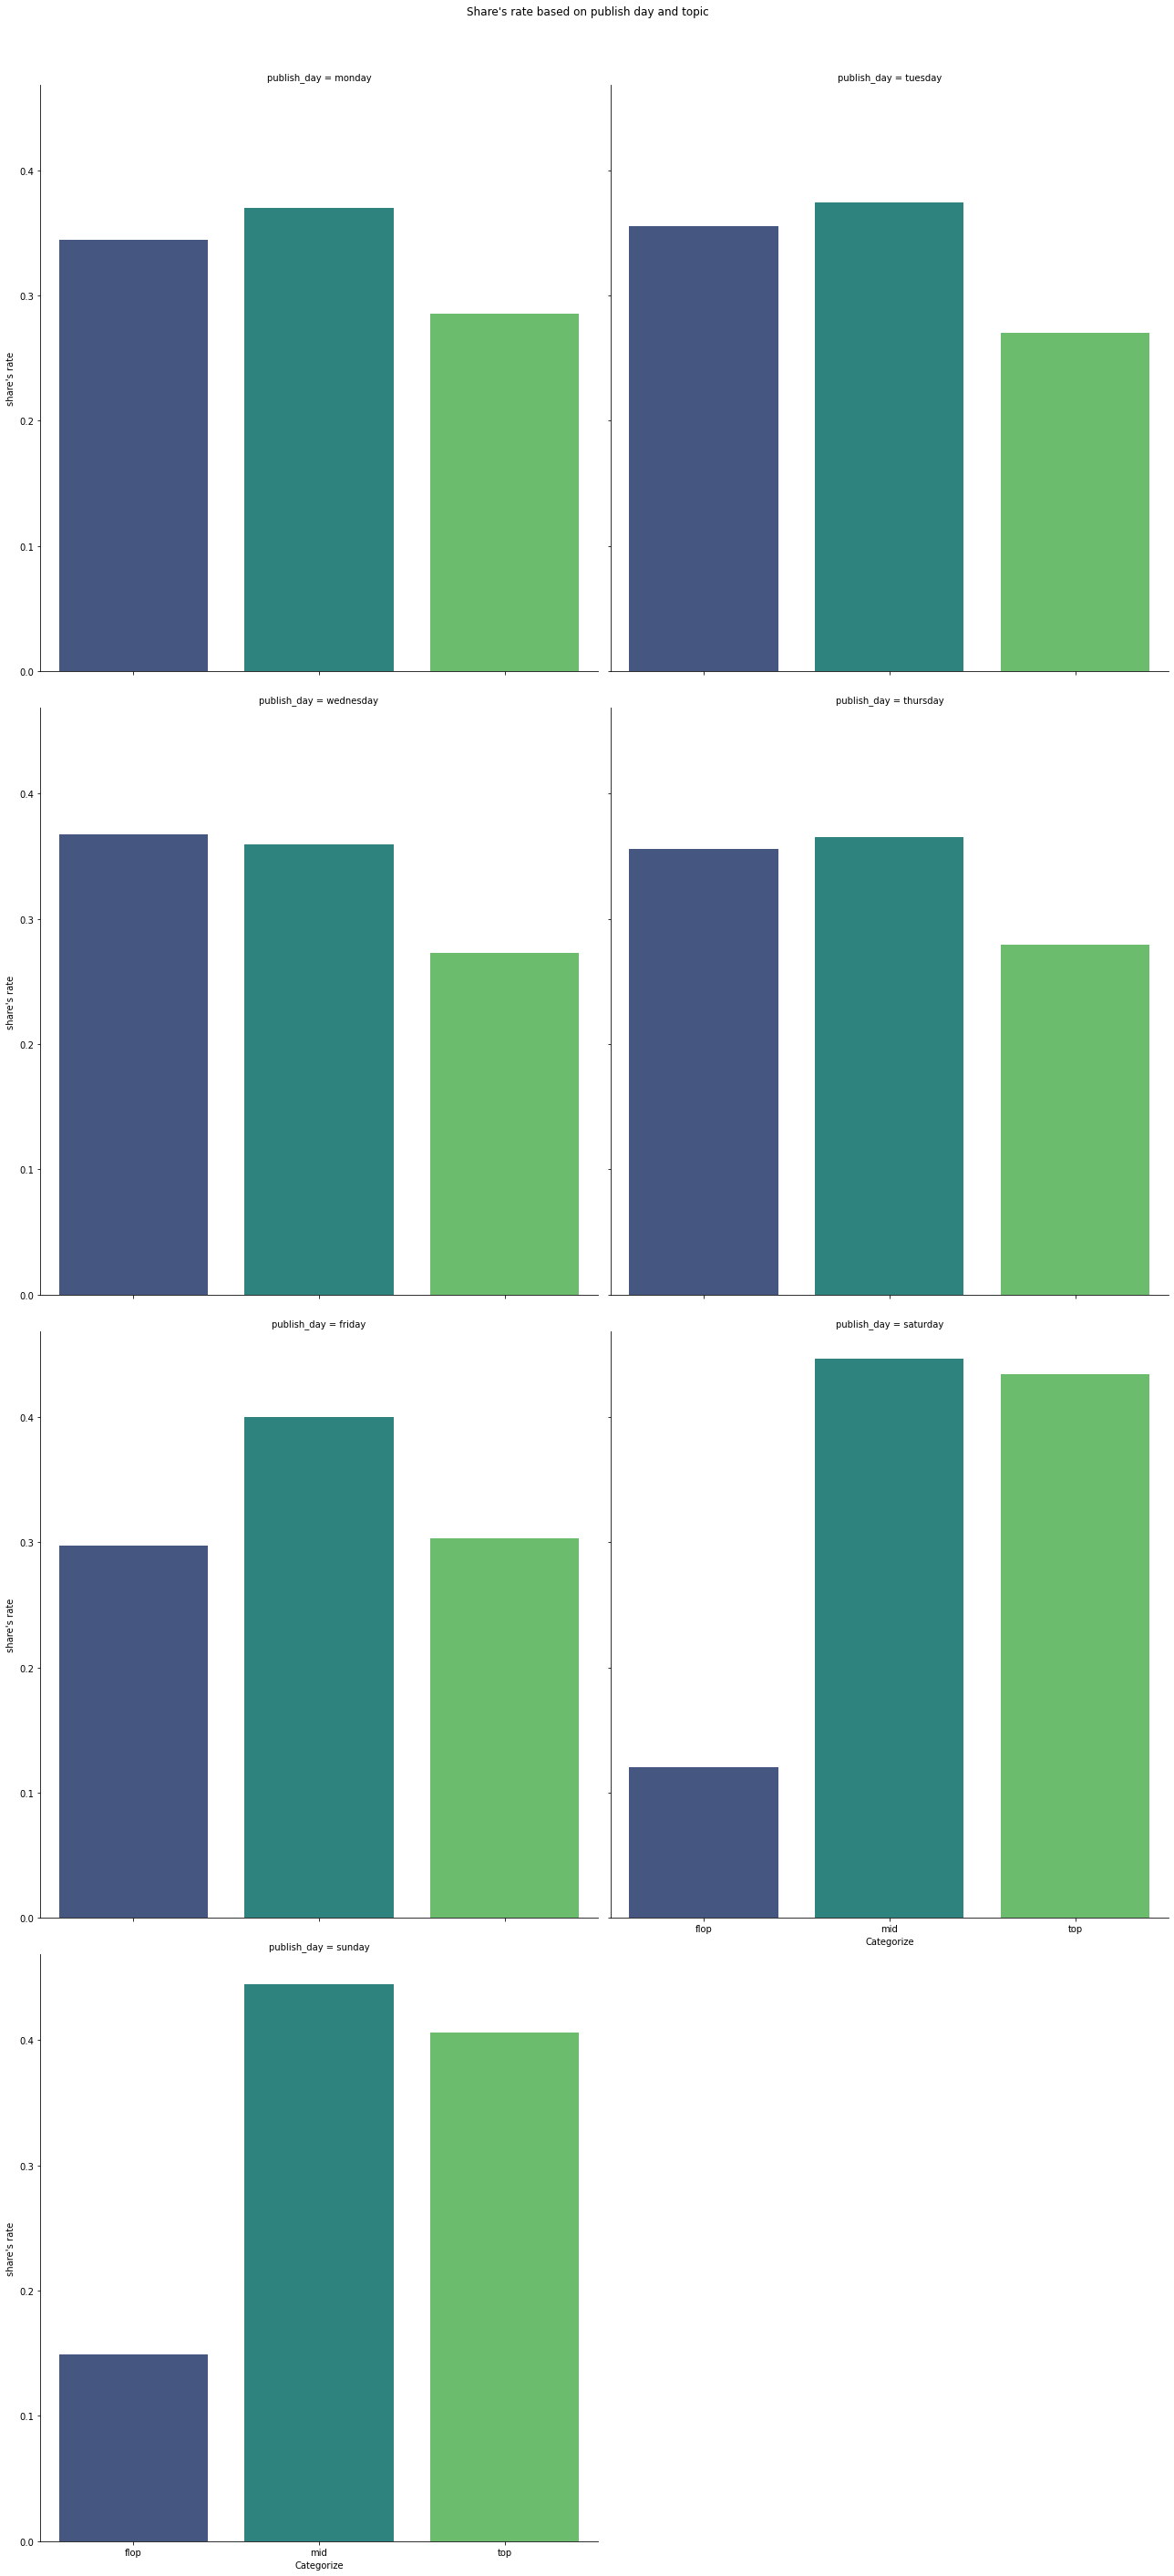

In [661]:
# Ajouter une colonne pour pondéré le nombre d'article par jours
def rate(data, **kwargs):
    data['rate'] = data.categorize.count() / kwargs['pond'][data[kwargs['col']].iloc[0]]
    return data

# Nombre total d'article publié par jours
tot_day = visu.groupby('publish_day').publish_day.count()

ponderate = visu[['categorize', 'publish_day']].groupby(['publish_day', 'categorize']).apply(rate, pond=tot_day, col="publish_day")

#supprimer les doublons après le groupby
ponderate.drop_duplicates(['categorize', 'publish_day', 'rate'], inplace=True)

# Création du graphique
ax = sns.catplot(x='categorize', y='rate', col="publish_day", data=ponderate, kind="bar", height=10, aspect=0.9,col_wrap=2,palette='viridis')

# Définir les étiquettes et les titres
ax.set_axis_labels("Categorize", "share's rate")
ax.fig.suptitle("Share's rate based on publish day and topic")

# Ajuster l'espacement pour le titre
ax.fig.subplots_adjust(top=0.95)

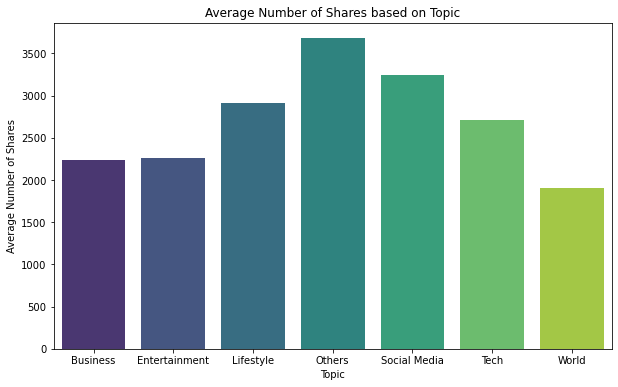

In [662]:
fig, axes = plt.subplots(figsize=(10, 6))

# Calculate the average number of shares for each topic
average_shares_by_topic = visu.groupby('topic')['shares'].mean().reset_index()

# Create a bar plot
ax = sns.barplot(x='topic', y='shares', data=average_shares_by_topic, palette='viridis', ax=axes)

# Set labels and title
ax.set(xlabel='Topic', ylabel='Average Number of Shares', title='Average Number of Shares based on Topic')

plt.show()


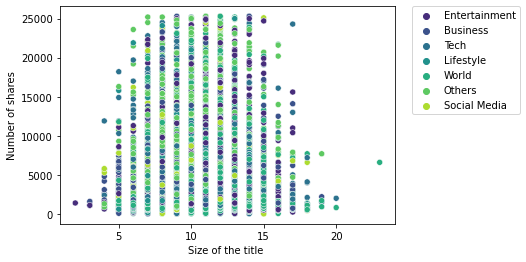

In [696]:
ax = sns.scatterplot(x='n_tokens_title',y='shares', hue='topic', data=visu,palette='viridis')
ax = ax.set(xlabel='Size of the title ', ylabel="Number of shares")

ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

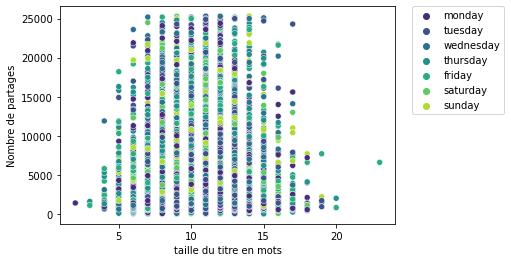

In [665]:
ax = sns.scatterplot(x='n_tokens_title',y='shares', hue='publish_day', data=visu_temp,palette='viridis')
ax = ax.set(xlabel='taille du titre en mots', ylabel="Nombre de partages")
# légende hors du graph
ax = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## <span style="color:blue">Part 6: Modelling :</span> 

In [666]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [734]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Maintenant, préparez vos données en utilisant df_filtered
x = df.drop(['shares', 'categorize'], axis=1)
y = df[['shares', 'categorize']]
# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Identification des colonnes à ne pas standardiser
publish_day = x.columns.values[list(x.columns).index('weekday_is_monday'):list(x.columns).index('weekday_is_sunday')+1].tolist()
channel = x.columns.values[list(x.columns).index('data_channel_is_lifestyle'):list(x.columns).index('data_channel_is_world')+1].tolist()
lda = x.columns.values[list(x.columns).index('LDA_00'):list(x.columns).index('LDA_04')+1].tolist()
columns_ns = publish_day + channel + lda + ['is_weekend']

# Standardisation des caractéristiques numériques
scaler = StandardScaler()
feature_column = x.drop(columns=columns_ns).columns
x_train_scaled = scaler.fit_transform(X_train[feature_column])
x_test_scaled = scaler.transform(X_test[feature_column])

# Création de DataFrame avec des colonnes correspondantes
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_column, index=X_train.index)
x_test_df = pd.DataFrame(x_test_scaled, columns=feature_column, index=X_test.index)

# Encodage de la colonne 'categorize'
label_encoder = LabelEncoder()
y_train['categorize_encoded'] = label_encoder.fit_transform(y_train['categorize'])
y_test['categorize_encoded'] = label_encoder.transform(y_test['categorize'])

# Concaténation des DataFrames d'entraînement
train_data = pd.concat([x_train_df, y_train.reset_index(drop=True)], axis=1)


In [735]:
train_data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'categorize',
       'categorize_encoded'],
      dtype='obj

In [736]:

train_data .isnull().sum()
train_data.dropna(inplace=True)
train_data .isna().sum()

n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
global_subjectivity             0
global_sentiment_polarity       0
global_rate_positive_words      0
global_rate_negative_words      0
rate_positive_words             0
rate_negative_words             0
avg_positive_p

In [737]:
train_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,categorize,categorize_encoded
4550,0.294381,-0.086593,-0.005584,-0.00574,-0.001125,-0.283643,-0.100800,-0.428881,-0.302080,0.832001,...,0.651511,0.492888,-0.148297,-0.871986,-0.270192,0.840419,-0.690754,853.0,flop,0.0
2520,-0.653461,-0.392428,0.001515,-0.00574,-0.013285,-0.104627,0.156851,-0.428881,3.837961,-0.279637,...,-0.269669,-0.223604,0.639204,-0.871986,-0.270192,0.840419,-0.690754,1100.0,mid,1.0
3669,-0.653461,-0.022432,-0.017772,-0.00574,-0.013738,-0.641677,-0.873754,-0.428881,-0.302080,0.056063,...,0.683076,0.880988,0.414203,-0.871986,-0.270192,0.840419,-0.690754,1400.0,mid,1.0
29239,0.294381,-0.118674,-0.013840,-0.00574,0.013264,-0.641677,-0.100800,-0.428881,0.184984,-1.604575,...,0.653940,0.851134,0.414203,-0.871986,-0.270192,0.840419,-0.690754,690.0,flop,0.0
23422,0.768302,-0.255551,-0.023322,-0.00574,-0.015806,-0.283643,-0.358451,-0.306014,-0.302080,0.458724,...,1.384236,1.567627,0.114203,-0.871986,-0.270192,0.840419,-0.690754,2700.0,top,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17069,-0.653461,-0.877914,0.017958,-0.00574,0.027726,-0.552168,-0.358451,-0.551748,-0.302080,-0.756086,...,-1.096622,0.492888,-3.035798,-0.871986,-0.270192,0.840419,-0.690754,1100.0,mid,1.0
6329,-0.179540,-1.072536,0.075422,-0.00574,0.046013,-0.552168,-0.100800,-0.551748,-0.302080,2.559233,...,-2.727557,-1.656589,-1.898297,1.533001,-1.071500,-0.335105,0.249424,1500.0,mid,1.0
11404,0.294381,-0.552831,-0.002039,-0.00574,-0.010242,-0.641677,-0.100800,1.414126,-0.302080,-0.456588,...,0.557283,1.030257,0.114203,-0.871986,-0.270192,0.840419,-0.690754,8000.0,top,2.0
865,-2.075224,-0.706817,0.010126,-0.00574,0.014162,-0.462660,-0.100800,-0.428881,-0.302080,0.090337,...,0.557283,0.851134,0.114203,-0.871986,-0.270192,0.840419,-0.690754,2900.0,top,2.0


we can see that the standardization is done, in fact all the mean are around 0 and all the standard deviation are equals to 1

# Heatmap of Correlation

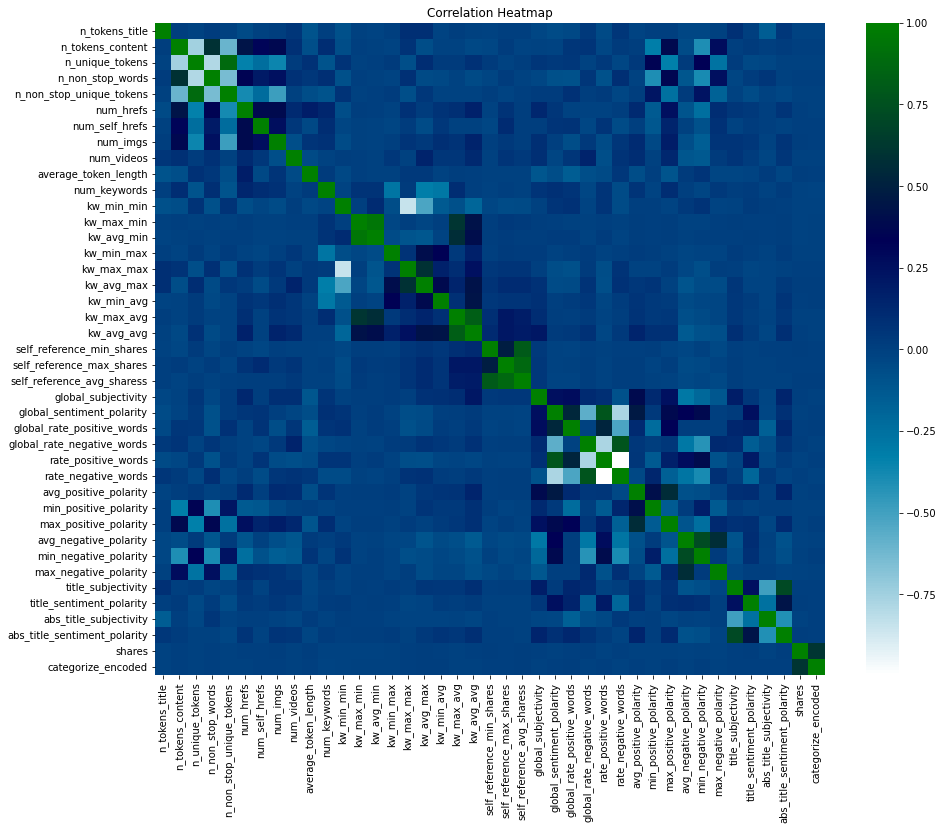

In [738]:
# Plotting correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=False, cmap='ocean_r', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [739]:
dropingcolumns=['n_non_stop_words','n_unique_tokens','n_non_stop_unique_tokens','num_self_hrefs','kw_min_min','kw_min_max','kw_max_min','kw_avg_avg','kw_min_avg','self_reference_min_shares','self_reference_max_shares','rate_positive_words','rate_negative_words','abs_title_sentiment_polarity','abs_title_subjectivity','global_sentiment_polarity','min_negative_polarity','avg_positive_polarity','avg_negative_polarity','max_negative_polarity','kw_avg_max']
train_data.drop(columns=dropingcolumns,inplace=True)
x_train_df.drop(columns=dropingcolumns,inplace=True)
x_test_df.drop(columns=dropingcolumns,inplace=True)


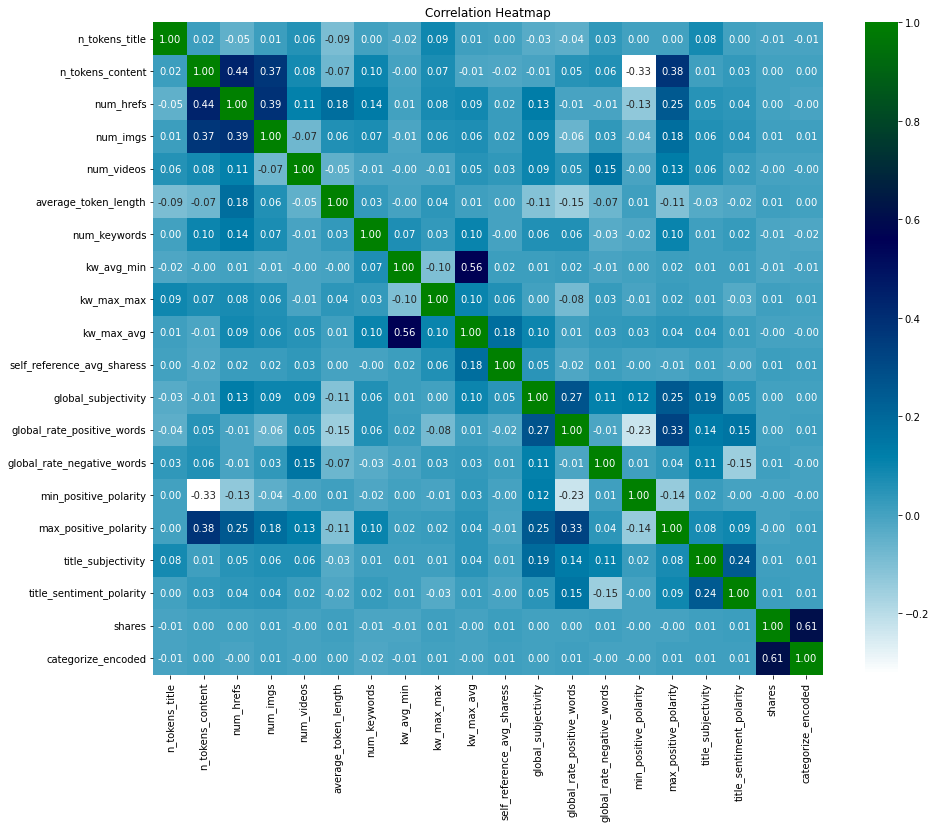

In [740]:
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=True, cmap='ocean_r', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

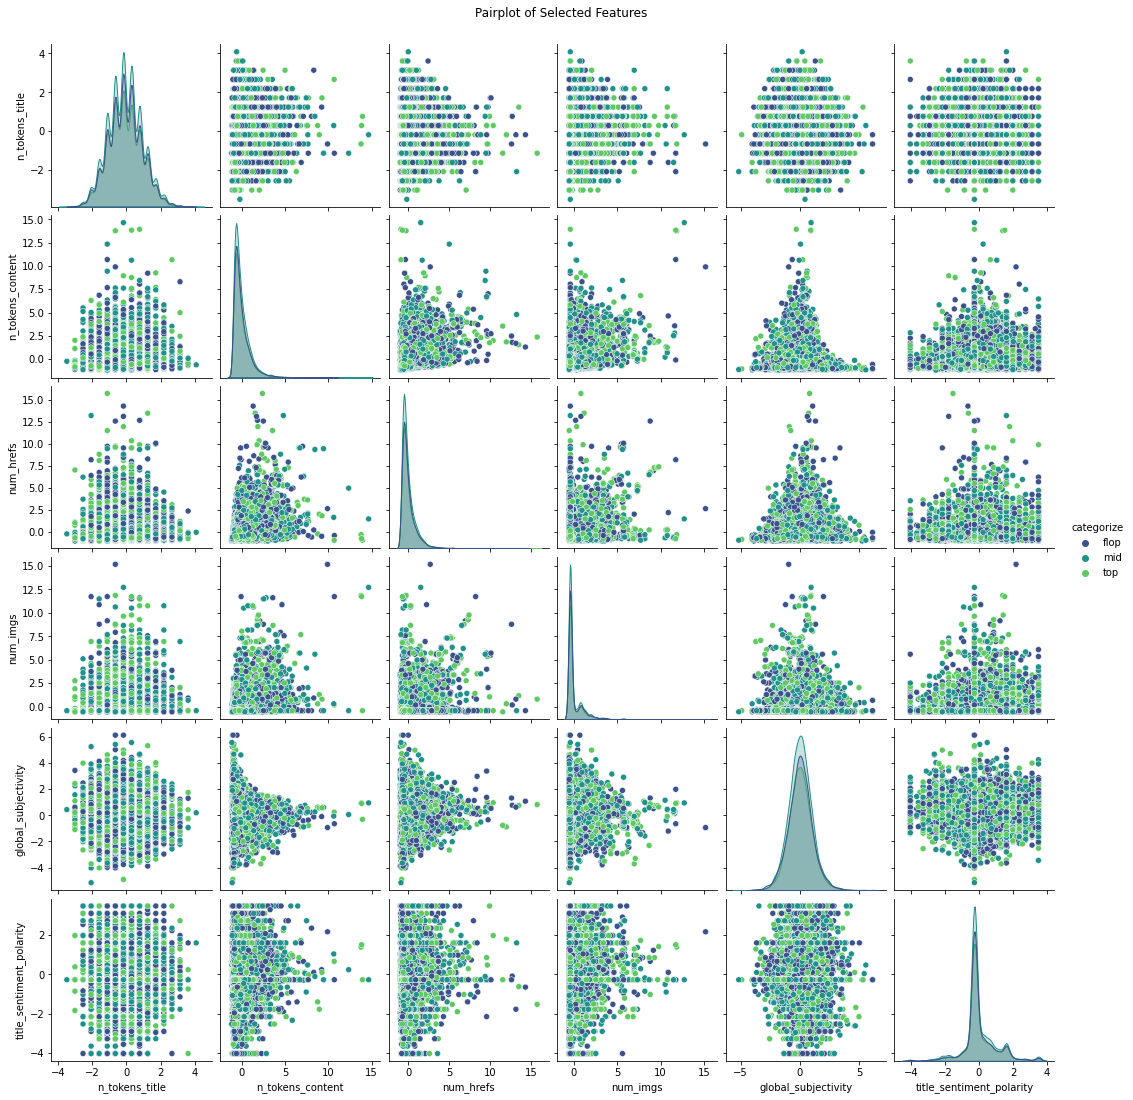

In [674]:
# Pairplot for selected features
selected_features = ['n_tokens_title','n_tokens_content', 'num_hrefs', 'num_imgs', 'global_subjectivity','title_sentiment_polarity', 'categorize']
sns.pairplot(train_data[selected_features],hue='categorize',palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

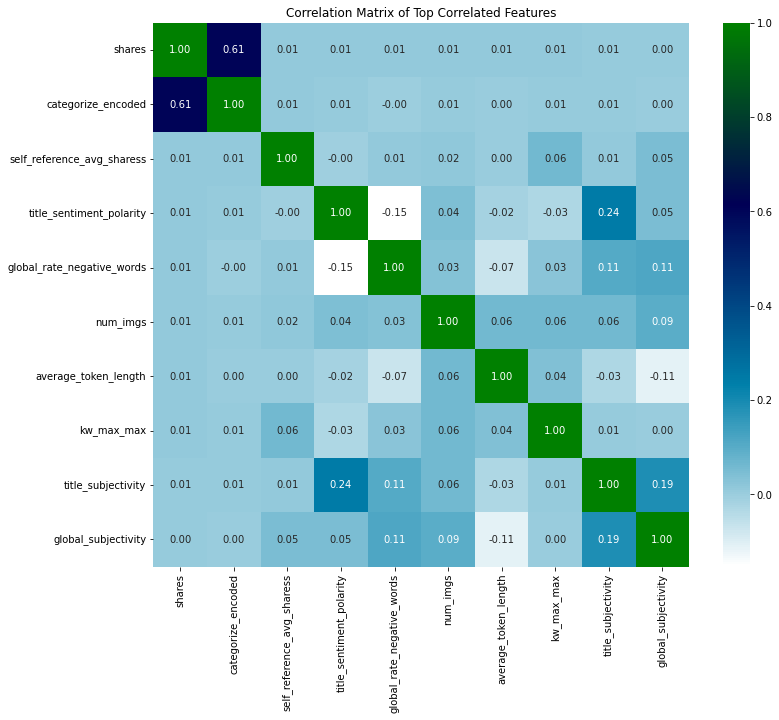

In [675]:
#Correlation Matrix for Top Correlated Features:
top_correlated_features = train_data.corr().nlargest(10, 'shares')['shares'].index
correlation_matrix = np.corrcoef(train_data[top_correlated_features].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='ocean_r', fmt=".2f", xticklabels=top_correlated_features.values, yticklabels=top_correlated_features.values)
plt.title('Correlation Matrix of Top Correlated Features')
plt.show()

In [676]:
algo_a_utiliser=['Arbres de décision','Forêts aléatoires ','Gradient Boosting (Gradient Boosted Trees) ','k-Nearest Neighbors','K-Means ','reseau de neuronnes']

# LinearRegression to start

In [725]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
# Création d'une instance de modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle

model.fit(x_train_df, y_train['shares'])
# Prédiction sur les données de test
y_pred = model.predict(x_test_df)

# Comparaison des prédictions avec les valeurs réelles de 'shares'
mse = mean_squared_error(y_test['shares'], y_pred)
r2 = r2_score(y_test['shares'], y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 9403313.145463472
R^2 Score: 0.03225522054648655


MSE very high and R_2 low

In [726]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Création du modèle de régression de forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)


# Entraînement du modèle sur les données d'entraînement
rf_model.fit(x_train_df, y_train['categorize_encoded'])

# Prédiction sur les données de test
y_pred_rf = rf_model.predict(x_test_df)

# Évaluation du modèle
mse_rf = mean_squared_error(y_test['categorize_encoded'], y_pred_rf)
r2_rf = r2_score(y_test['categorize_encoded'], y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R^2 Score:", r2_rf)


Random Forest - Mean Squared Error: 0.5431115417033101
Random Forest - R^2 Score: 0.11070457159890179


MSE ok, but r2 score 

In [727]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Créer une instance de Ridge
ridge_model = Ridge(alpha=1.0) # alpha est le paramètre de régularisation

# Entraînement du modèle
ridge_model.fit(x_train_df, y_train['shares'])

# Prédiction sur les données de test
y_pred_ridge = ridge_model.predict(x_test_df)

# Évaluation du modèle
mse_ridge = mean_squared_error(y_test['shares'], y_pred_ridge)
r2_ridge = r2_score(y_test['shares'], y_pred_ridge)

print("Ridge Regression - Mean Squared Error:", mse_ridge)
print("Ridge Regression - R^2 Score:", r2_ridge)

Ridge Regression - Mean Squared Error: 9403313.11654438
Ridge Regression - R^2 Score: 0.03225522352270338


In [728]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Grille de paramètres pour Lasso
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Créer une instance de Lasso
lasso = Lasso()

# Instancier le Grid Search model
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Adapter le Grid Search au modèle
grid_search_lasso.fit(x_train_df, y_train['categorize_encoded'])

# Meilleur modèle
best_lasso = grid_search_lasso.best_estimator_

# Prédiction et évaluation
y_pred_lasso = best_lasso.predict(x_test_df)
mse_lasso = mean_squared_error(y_test['categorize_encoded'], y_pred_lasso)
r2_lasso = r2_score(y_test['categorize_encoded'], y_pred_lasso)


# Convertir les prédictions en classes
y_pred_classes = np.round(y_pred_lasso).astype(int)

# Calculer l'accuracy
accuracy = accuracy_score(y_test['categorize_encoded'], y_pred_classes)

print("Lasso Regression - Best Alpha:", grid_search_lasso.best_params_)
print("Lasso Regression - Accuracy:", accuracy)
print("Lasso Regression - Mean Squared Error:", mse_lasso)
print("Lasso Regression - R^2 Score:", r2_lasso)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
Lasso Regression - Best Alpha: {'alpha': 0.001}
Lasso Regression - Accuracy: 0.3892988929889299
Lasso Regression - Mean Squared Error: 0.5853919442582628
Lasso Regression - R^2 Score: 0.0414742831296917


Fitting 3 folds for each of 330 candidates, totalling 990 fits
Meilleurs paramètres trouvés :  {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_impurity_decrease': 0.0001}
Accuracy du meilleur modèle : 0.4368740115972588
R² du meilleur modèle : 0.4368740115972588
meamn squared error du meilleur modèle : 0.8473906167633105


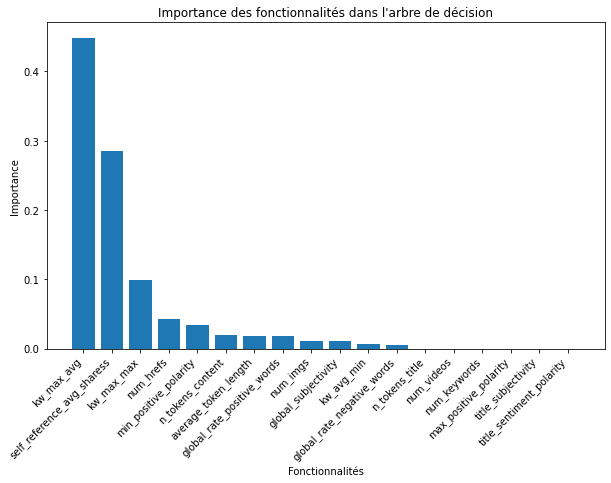

In [745]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Définir les hyperparamètres à tester
param_grid = {
    'min_impurity_decrease': [0.01, 0.005, 0.001, 0.0005, 0.0001],
    'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12, 20, 30],
    'max_features': ['auto', 'log2', None],
    'criterion': ['entropy', 'gini']
}

# Créer l'instance du modèle
decision_tree = DecisionTreeClassifier(random_state=42)

# Instancier le Grid Search model
grid_search = GridSearchCV(decision_tree, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Adapter le Grid Search au modèle
grid_search.fit(x_train_df, y_train['categorize_encoded'])

# Meilleur modèle et paramètres
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Meilleurs paramètres trouvés : ", best_params)

# Prédiction et évaluation avec le meilleur modèle
y_pred = best_tree.predict(x_test_df)
accuracy = accuracy_score(y_test['categorize_encoded'], y_pred)
r2_dtc=r2_score(y_test['categorize_encoded'], y_pred)
mse_dtc=mean_squared_error(y_test['categorize_encoded'], y_pred)
print("Accuracy du meilleur modèle :", accuracy)
print("R² du meilleur modèle :", accuracy)
print("meamn squared error du meilleur modèle :", mse_dtc)
# Extraire l'importance des fonctionnalités du meilleur modèle
feature_importances = best_tree.feature_importances_

# Associer les importances aux noms de fonctionnalités
features = x_train_df.columns
feature_importance_dict = dict(zip(features, feature_importances))

# Trier les fonctionnalités par importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Afficher l'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), [val[1] for val in sorted_features], align='center')
plt.xticks(range(len(sorted_features)), [val[0] for val in sorted_features], rotation=45, ha='right')
plt.xlabel('Fonctionnalités')
plt.ylabel('Importance')
plt.title('Importance des fonctionnalités dans l\'arbre de décision')
plt.show()

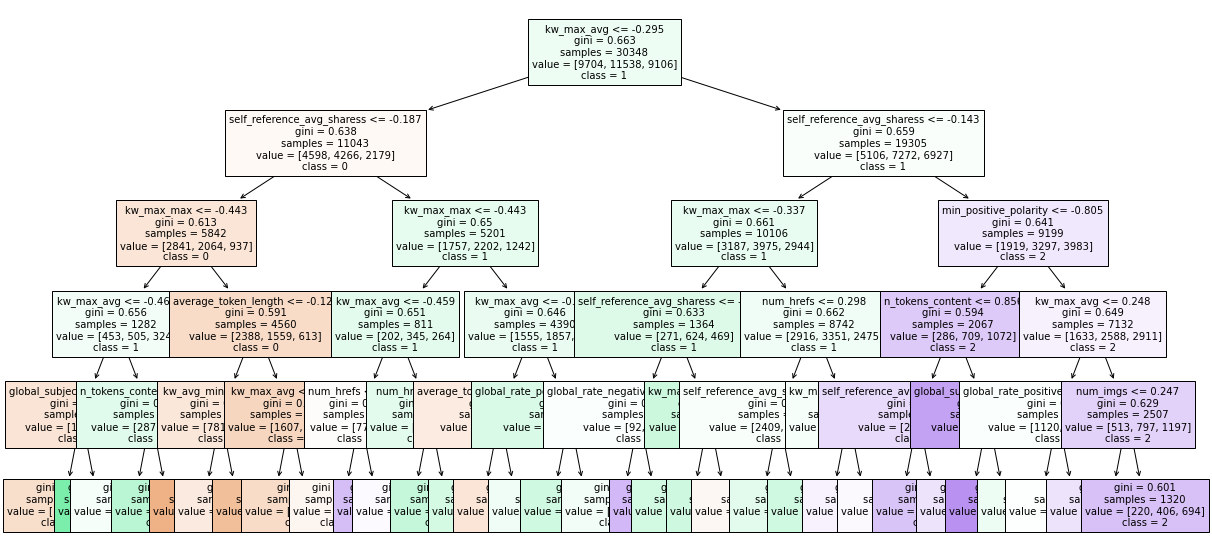

In [682]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(20,10))  # Ajustez la taille selon vos besoins et votre écran

# Assurez-vous que best_tree est votre modèle entraîné optimal
best_tree = grid_search.best_estimator_
# Conversion des noms de classe en chaînes de caractères
class_names_str = [str(cls) for cls in best_tree.classes_]

# Visualisation de l'arbre avec les noms de classe convertis
tree.plot_tree(best_tree, feature_names=x_train_df.columns, class_names=class_names_str, fontsize=10, filled=True)

plt.show()



In [683]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Nombre de features dans votre dataset
n_features = x_train_df.shape[1]

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Pas d'activation pour la couche de sortie en régression

#Compilation du modèle pour la régression
model.compile(optimizer='adam', loss='mean_squared_error')


# Résumé du modèle
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                190       
                                                                 
 dense_31 (Dense)            (None, 8)                 88        
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [684]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import r2_score

# Création d'une classe de rappel (Callback) pour calculer R² à chaque époque
class R2Callback(Callback):
    def __init__(self, x_val, y_val):
        self.x_val = x_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x_val)
        r2_val = r2_score(self.y_val, y_pred)
        print(f'\nEpoch {epoch + 1} - R²: {r2_val:.4f}')

# Nombre de features dans votre dataset
n_features = x_train_df.shape[1]

# Création du modèle séquentiel
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilation du modèle pour la régression
model.compile(optimizer='adam', loss='mean_squared_error')

# Création d'une instance de la classe R2Callback
r2_callback = R2Callback(x_val=x_test_df, y_val=y_test['categorize_encoded'])

# Entraînement du modèle avec le callback R2Callback
history = model.fit(x_train_df, y_train['categorize_encoded'], epochs=100, validation_data=(x_test_df, y_test['categorize_encoded']), callbacks=[r2_callback])


Epoch 1/100
238/238 [==============================] - 0s 613us/steps: 0

Epoch 1 - R²: 0.0257
949/949 [==============================] - 2s 1ms/step - loss: 0.7207 - val_loss: 0.5950
Epoch 2/100
238/238 [==============================] - 0s 595us/steps: 

Epoch 2 - R²: 0.0468
949/949 [==============================] - 1s 1ms/step - loss: 0.5977 - val_loss: 0.5822
Epoch 3/100
238/238 [==============================] - 0s 608us/steps: 

Epoch 3 - R²: 0.0576
949/949 [==============================] - 1s 1ms/step - loss: 0.5859 - val_loss: 0.5756
Epoch 4/100
238/238 [==============================] - 0s 605us/steps: 

Epoch 4 - R²: 0.0644
949/949 [==============================] - 1s 1ms/step - loss: 0.5802 - val_loss: 0.5714
Epoch 5/100
238/238 [==============================] - 0s 601us/steps: 

Epoch 5 - R²: 0.0685
949/949 [==============================] - 1s 1ms/step - loss: 0.5757 - val_loss: 0.5689
Epoch 6/100
238/238 [==============================] - 0s 602us/steps: 

Epoch 6 - R

Epoch 46/100
238/238 [==============================] - 0s 866us/step

Epoch 46 - R²: 0.0843
949/949 [==============================] - 2s 2ms/step - loss: 0.5553 - val_loss: 0.5593
Epoch 47/100
238/238 [==============================] - 0s 591us/steps: 

Epoch 47 - R²: 0.0882
949/949 [==============================] - 1s 1ms/step - loss: 0.5558 - val_loss: 0.5568
Epoch 48/100
238/238 [==============================] - 0s 593us/steps: 

Epoch 48 - R²: 0.0893
949/949 [==============================] - 1s 1ms/step - loss: 0.5561 - val_loss: 0.5562
Epoch 49/100
238/238 [==============================] - 0s 591us/steps: 

Epoch 49 - R²: 0.0886
949/949 [==============================] - 1s 1ms/step - loss: 0.5558 - val_loss: 0.5566
Epoch 50/100
238/238 [==============================] - 0s 605us/steps: 

Epoch 50 - R²: 0.0894
949/949 [==============================] - 1s 1ms/step - loss: 0.5554 - val_loss: 0.5561
Epoch 51/100
238/238 [==============================] - 0s 595us/steps: 

Epoc

238/238 [==============================] - 0s 593us/steps: 

Epoch 90 - R²: 0.0892
949/949 [==============================] - 1s 1ms/step - loss: 0.5537 - val_loss: 0.5563
Epoch 91/100
238/238 [==============================] - 0s 589us/steps: 

Epoch 91 - R²: 0.0856
949/949 [==============================] - 1s 1ms/step - loss: 0.5535 - val_loss: 0.5585
Epoch 92/100
238/238 [==============================] - 0s 607us/steps: 

Epoch 92 - R²: 0.0889
949/949 [==============================] - 1s 1ms/step - loss: 0.5535 - val_loss: 0.5564
Epoch 93/100
238/238 [==============================] - 0s 604us/steps: 

Epoch 93 - R²: 0.0887
949/949 [==============================] - 1s 1ms/step - loss: 0.5536 - val_loss: 0.5565
Epoch 94/100
238/238 [==============================] - 0s 606us/steps: 

Epoch 94 - R²: 0.0879
949/949 [==============================] - 1s 1ms/step - loss: 0.5534 - val_loss: 0.5570
Epoch 95/100
238/238 [==============================] - 0s 592us/steps: 

Epoch 95 - R²:

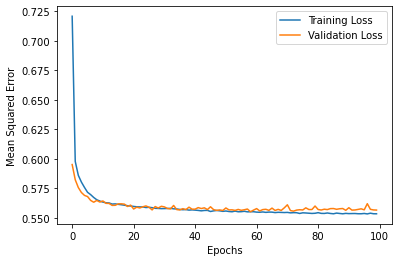

In [685]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

GRID SEARCH POUR RESEAU DE NEURONNE 


In [686]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Initialisation des hyperparamètres à tester
epochs_values = [50, 100, 150]
batch_size_values = [16, 32, 64]
validation_split_values = [0.1, 0.2, 0.3]

# Initialisation de la meilleure perte et des meilleurs hyperparamètres
best_loss = float('inf')
best_params = {}

# Initialisation des meilleures importances de caractéristiques
best_feature_importances = None

# Création du modèle 
model = Sequential([
    Dense(10, activation='relu', input_shape=(x_train_df.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1)  
])
model.compile(optimizer='adam', loss='mean_squared_error')


for epochs in epochs_values:
    for batch_size in batch_size_values:
        for validation_split in validation_split_values:
            print(f"Training with epochs={epochs}, batch_size={batch_size}, validation_split={validation_split}")

            # Entraînement du modèle avec les hyperparamètres actuels
            model.fit(x_train_df, y_train['shares'], epochs=epochs, batch_size=batch_size, validation_split=validation_split)
            
            # Évaluation du modèle sur l'ensemble de test
            loss = model.evaluate(x_test_df, y_test['shares'])
            print(f"Test Loss with epochs={epochs}, batch_size={batch_size}, validation_split={validation_split}: {loss}")

            # Mise à jour de la meilleure perte et des meilleurs hyperparamètres si nécessaire
            if loss < best_loss:
                best_loss = loss
                best_params = {'epochs': epochs, 'batch_size': batch_size, 'validation_split': validation_split}
                
                # Enregistrement des importances de caractéristiques pour ce modèle
                best_feature_importances = model.layers[0].get_weights()[0]

# Afficher la meilleure perte et les meilleurs hyperparamètres
print(f"Best Loss: {best_loss}")
print(f"Best Hyperparameters: {best_params}")

# Assurez-vous que best_feature_importances est un tableau unidimensionnel
best_feature_importances = best_feature_importances.flatten()

# Trier les importances de caractéristiques
importances = sorted(zip(best_feature_importances, x_train_df.columns), reverse=True)

# Afficher les importances de caractéristiques pour le meilleur modèle
for importance, feature in importances:
    print(f"{feature}: {importance}")



Training with epochs=50, batch_size=16, validation_split=0.1
Epoch 1/50
1708/1708 [==============================] - 2s 883us/step - loss: 15301958.0000 - val_loss: 11868989.0000
Epoch 2/50
1708/1708 [==============================] - 1s 838us/step - loss: 10782670.0000 - val_loss: 10536442.0000
Epoch 3/50
1708/1708 [==============================] - 1s 825us/step - loss: 10485824.0000 - val_loss: 10454680.0000
Epoch 4/50
1708/1708 [==============================] - 1s 825us/step - loss: 10436808.0000 - val_loss: 10415055.0000
Epoch 5/50
1708/1708 [==============================] - 1s 827us/step - loss: 10405735.0000 - val_loss: 10387496.0000
Epoch 6/50
1708/1708 [==============================] - 1s 874us/step - loss: 10381594.0000 - val_loss: 10366699.0000
Epoch 7/50
1708/1708 [==============================] - 1s 823us/step - loss: 10362700.0000 - val_loss: 10352281.0000
Epoch 8/50
1708/1708 [==============================] - 1s 830us/step - loss: 10347881.0000 - val_loss: 10340851.

1518/1518 [==============================] - 1s 942us/step - loss: 10205528.0000 - val_loss: 10294790.0000
Epoch 18/50
1518/1518 [==============================] - 1s 958us/step - loss: 10204398.0000 - val_loss: 10295229.0000
Epoch 19/50
1518/1518 [==============================] - 1s 956us/step - loss: 10204302.0000 - val_loss: 10297172.0000
Epoch 20/50
1518/1518 [==============================] - 1s 927us/step - loss: 10203330.0000 - val_loss: 10296886.0000
Epoch 21/50
1518/1518 [==============================] - 1s 919us/step - loss: 10202694.0000 - val_loss: 10294052.0000
Epoch 22/50
1518/1518 [==============================] - 1s 927us/step - loss: 10201927.0000 - val_loss: 10295488.0000
Epoch 23/50
1518/1518 [==============================] - 1s 954us/step - loss: 10199973.0000 - val_loss: 10293747.0000
Epoch 24/50
1518/1518 [==============================] - 1s 948us/step - loss: 10198787.0000 - val_loss: 10292064.0000
Epoch 25/50
1518/1518 [==============================] - 1s 

Epoch 35/50
1328/1328 [==============================] - 2s 1ms/step - loss: 9978237.0000 - val_loss: 10002625.0000
Epoch 36/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9974395.0000 - val_loss: 9998682.0000
Epoch 37/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9970221.0000 - val_loss: 9999262.0000
Epoch 38/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9967604.0000 - val_loss: 9996242.0000
Epoch 39/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9965445.0000 - val_loss: 9996757.0000
Epoch 40/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9962878.0000 - val_loss: 9990296.0000
Epoch 41/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9958514.0000 - val_loss: 9991307.0000
Epoch 42/50
1328/1328 [==============================] - 1s 1ms/step - loss: 9957062.0000 - val_loss: 9986531.0000
Epoch 43/50
1328/1328 [==============================] - 1s 1ms/step - loss: 99

759/759 [==============================] - 1s 940us/step - loss: 9899456.0000 - val_loss: 9969278.0000
Epoch 3/50
759/759 [==============================] - 1s 939us/step - loss: 9898691.0000 - val_loss: 9968347.0000
Epoch 4/50
759/759 [==============================] - 1s 939us/step - loss: 9896279.0000 - val_loss: 9983224.0000
Epoch 5/50
759/759 [==============================] - 1s 957us/step - loss: 9897512.0000 - val_loss: 9973564.0000
Epoch 6/50
759/759 [==============================] - 1s 959us/step - loss: 9895779.0000 - val_loss: 9991894.0000
Epoch 7/50
759/759 [==============================] - 1s 980us/step - loss: 9896347.0000 - val_loss: 9983804.0000
Epoch 8/50
759/759 [==============================] - 1s 973us/step - loss: 9895563.0000 - val_loss: 9988236.0000
Epoch 9/50
759/759 [==============================] - 1s 938us/step - loss: 9895821.0000 - val_loss: 9983579.0000
Epoch 10/50
759/759 [==============================] - 1s 947us/step - loss: 9894570.0000 - val_los

664/664 [==============================] - 1s 1ms/step - loss: 9889551.0000 - val_loss: 9945881.0000
Epoch 23/50
664/664 [==============================] - 1s 1ms/step - loss: 9888925.0000 - val_loss: 9948781.0000
Epoch 24/50
664/664 [==============================] - 1s 1ms/step - loss: 9887680.0000 - val_loss: 9937196.0000
Epoch 25/50
664/664 [==============================] - 1s 1ms/step - loss: 9888289.0000 - val_loss: 9942644.0000
Epoch 26/50
664/664 [==============================] - 1s 1ms/step - loss: 9888150.0000 - val_loss: 9946393.0000
Epoch 27/50
664/664 [==============================] - 1s 1ms/step - loss: 9887196.0000 - val_loss: 9951375.0000
Epoch 28/50
664/664 [==============================] - 1s 1ms/step - loss: 9886532.0000 - val_loss: 9946160.0000
Epoch 29/50
664/664 [==============================] - 1s 1ms/step - loss: 9886462.0000 - val_loss: 9945282.0000
Epoch 30/50
664/664 [==============================] - 1s 1ms/step - loss: 9886919.0000 - val_loss: 9947923.

427/427 [==============================] - 0s 894us/step - loss: 9886146.0000 - val_loss: 9910727.0000
Epoch 43/50
427/427 [==============================] - 0s 887us/step - loss: 9885440.0000 - val_loss: 9908466.0000
Epoch 44/50
427/427 [==============================] - 0s 889us/step - loss: 9886097.0000 - val_loss: 9909222.0000
Epoch 45/50
427/427 [==============================] - 0s 878us/step - loss: 9885109.0000 - val_loss: 9909020.0000
Epoch 46/50
427/427 [==============================] - 0s 903us/step - loss: 9885056.0000 - val_loss: 9904864.0000
Epoch 47/50
427/427 [==============================] - 0s 890us/step - loss: 9885558.0000 - val_loss: 9906094.0000
Epoch 48/50
427/427 [==============================] - 0s 929us/step - loss: 9885354.0000 - val_loss: 9904242.0000
Epoch 49/50
427/427 [==============================] - 0s 903us/step - loss: 9885179.0000 - val_loss: 9911159.0000
Epoch 50/50
238/238 [==============================] - 0s 667us/step - loss: 9157885.0000
Te

332/332 [==============================] - 0s 1ms/step - loss: 9870687.0000 - val_loss: 9938803.0000
Epoch 11/50
332/332 [==============================] - 0s 1ms/step - loss: 9869876.0000 - val_loss: 9939103.0000
Epoch 12/50
332/332 [==============================] - 0s 1ms/step - loss: 9869922.0000 - val_loss: 9937274.0000
Epoch 13/50
332/332 [==============================] - 0s 1ms/step - loss: 9870079.0000 - val_loss: 9940638.0000
Epoch 14/50
332/332 [==============================] - 0s 1ms/step - loss: 9869917.0000 - val_loss: 9941638.0000
Epoch 15/50
332/332 [==============================] - 0s 1ms/step - loss: 9868636.0000 - val_loss: 9947706.0000
Epoch 16/50
332/332 [==============================] - 0s 1ms/step - loss: 9869387.0000 - val_loss: 9942077.0000
Epoch 17/50
332/332 [==============================] - 0s 1ms/step - loss: 9869218.0000 - val_loss: 9945721.0000
Epoch 18/50
332/332 [==============================] - 0s 1ms/step - loss: 9868652.0000 - val_loss: 9948124.

1708/1708 [==============================] - 1s 833us/step - loss: 9881181.0000 - val_loss: 9904685.0000
Epoch 30/100
1708/1708 [==============================] - 1s 854us/step - loss: 9881683.0000 - val_loss: 9911571.0000
Epoch 31/100
1708/1708 [==============================] - 1s 839us/step - loss: 9881737.0000 - val_loss: 9915633.0000
Epoch 32/100
1708/1708 [==============================] - 1s 858us/step - loss: 9880969.0000 - val_loss: 9909622.0000
Epoch 33/100
1708/1708 [==============================] - 1s 837us/step - loss: 9879331.0000 - val_loss: 9906206.0000
Epoch 34/100
1708/1708 [==============================] - 1s 840us/step - loss: 9881130.0000 - val_loss: 9915413.0000
Epoch 35/100
1708/1708 [==============================] - 1s 846us/step - loss: 9880971.0000 - val_loss: 9912512.0000
Epoch 36/100
1708/1708 [==============================] - 1s 849us/step - loss: 9879860.0000 - val_loss: 9898396.0000
Epoch 37/100
1708/1708 [==============================] - 1s 837us/st

1708/1708 [==============================] - 1s 840us/step - loss: 9873445.0000 - val_loss: 9901324.0000
Epoch 99/100
1708/1708 [==============================] - 1s 830us/step - loss: 9874316.0000 - val_loss: 9914125.0000
Epoch 100/100
238/238 [==============================] - 0s 672us/step - loss: 9174629.0000
Test Loss with epochs=100, batch_size=16, validation_split=0.1: 9174629.0
Training with epochs=100, batch_size=16, validation_split=0.2
Epoch 1/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9859570.0000 - val_loss: 9953020.0000
Epoch 2/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9857762.0000 - val_loss: 9948836.0000
Epoch 3/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9858105.0000 - val_loss: 9957358.0000
Epoch 4/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9857533.0000 - val_loss: 9961294.0000
Epoch 5/100
1518/1518 [==============================] - 1s 913us/step - loss: 9857414.00

Epoch 66/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9849085.0000 - val_loss: 10006039.0000
Epoch 67/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9849460.0000 - val_loss: 10003933.0000
Epoch 68/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9849532.0000 - val_loss: 9995745.0000
Epoch 69/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9848662.0000 - val_loss: 9993560.0000
Epoch 70/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9848321.0000 - val_loss: 10004197.0000
Epoch 71/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9847688.0000 - val_loss: 9998447.0000
Epoch 72/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9847121.0000 - val_loss: 9997638.0000
Epoch 73/100
1518/1518 [==============================] - 2s 1ms/step - loss: 9848850.0000 - val_loss: 10004440.0000
Epoch 74/100
1518/1518 [==============================] - 2s 1ms/ste

1328/1328 [==============================] - 2s 1ms/step - loss: 9851479.0000 - val_loss: 9949885.0000
Epoch 35/100
1328/1328 [==============================] - 2s 1ms/step - loss: 9850441.0000 - val_loss: 9949606.0000
Epoch 36/100
1328/1328 [==============================] - 2s 1ms/step - loss: 9850187.0000 - val_loss: 9954298.0000
Epoch 37/100
1328/1328 [==============================] - 1s 1ms/step - loss: 9850441.0000 - val_loss: 9947192.0000
Epoch 38/100
1328/1328 [==============================] - 2s 1ms/step - loss: 9850454.0000 - val_loss: 9956122.0000
Epoch 39/100
1328/1328 [==============================] - 1s 1ms/step - loss: 9848880.0000 - val_loss: 9963029.0000
Epoch 40/100
1328/1328 [==============================] - 2s 1ms/step - loss: 9849041.0000 - val_loss: 9956598.0000
Epoch 41/100
1328/1328 [==============================] - 2s 1ms/step - loss: 9848718.0000 - val_loss: 9958420.0000
Epoch 42/100
1328/1328 [==============================] - 2s 1ms/step - loss: 9849115

Epoch 3/100
854/854 [==============================] - 1s 943us/step - loss: 9868411.0000 - val_loss: 9910189.0000
Epoch 4/100
854/854 [==============================] - 1s 945us/step - loss: 9865868.0000 - val_loss: 9928871.0000
Epoch 5/100
854/854 [==============================] - 1s 959us/step - loss: 9866904.0000 - val_loss: 9909687.0000
Epoch 6/100
854/854 [==============================] - 1s 938us/step - loss: 9866387.0000 - val_loss: 9917286.0000
Epoch 7/100
854/854 [==============================] - 1s 956us/step - loss: 9865719.0000 - val_loss: 9916306.0000
Epoch 8/100
854/854 [==============================] - 1s 953us/step - loss: 9864107.0000 - val_loss: 9902478.0000
Epoch 9/100
854/854 [==============================] - 1s 946us/step - loss: 9864131.0000 - val_loss: 9913844.0000
Epoch 10/100
854/854 [==============================] - 1s 932us/step - loss: 9865061.0000 - val_loss: 9907731.0000
Epoch 11/100
854/854 [==============================] - 1s 959us/step - loss: 9

854/854 [==============================] - 1s 913us/step - loss: 9852141.0000 - val_loss: 9904162.0000
Epoch 75/100
854/854 [==============================] - 1s 900us/step - loss: 9851654.0000 - val_loss: 9921187.0000
Epoch 76/100
854/854 [==============================] - 1s 897us/step - loss: 9850741.0000 - val_loss: 9937283.0000
Epoch 77/100
854/854 [==============================] - 1s 967us/step - loss: 9852495.0000 - val_loss: 9909846.0000
Epoch 78/100
854/854 [==============================] - 1s 945us/step - loss: 9851519.0000 - val_loss: 9905427.0000
Epoch 79/100
854/854 [==============================] - 1s 956us/step - loss: 9851796.0000 - val_loss: 9908324.0000
Epoch 80/100
854/854 [==============================] - 1s 933us/step - loss: 9851581.0000 - val_loss: 9912945.0000
Epoch 81/100
854/854 [==============================] - 1s 952us/step - loss: 9852123.0000 - val_loss: 9923847.0000
Epoch 82/100
854/854 [==============================] - 1s 949us/step - loss: 9850098

759/759 [==============================] - 1s 1ms/step - loss: 9815664.0000 - val_loss: 10015727.0000
Epoch 44/100
759/759 [==============================] - 1s 1ms/step - loss: 9817526.0000 - val_loss: 10016898.0000
Epoch 45/100
759/759 [==============================] - 1s 1ms/step - loss: 9816788.0000 - val_loss: 10019199.0000
Epoch 46/100
759/759 [==============================] - 1s 1ms/step - loss: 9816871.0000 - val_loss: 10026523.0000
Epoch 47/100
759/759 [==============================] - 1s 1ms/step - loss: 9816836.0000 - val_loss: 10025684.0000
Epoch 48/100
759/759 [==============================] - 1s 1ms/step - loss: 9815403.0000 - val_loss: 10029964.0000
Epoch 49/100
759/759 [==============================] - 1s 1ms/step - loss: 9816460.0000 - val_loss: 10021703.0000
Epoch 50/100
759/759 [==============================] - 1s 1ms/step - loss: 9815710.0000 - val_loss: 10026841.0000
Epoch 51/100
759/759 [==============================] - 1s 1ms/step - loss: 9815807.0000 - va

664/664 [==============================] - 1s 1ms/step - loss: 9817514.0000 - val_loss: 9949832.0000
Epoch 13/100
664/664 [==============================] - 1s 1ms/step - loss: 9817330.0000 - val_loss: 9950916.0000
Epoch 14/100
664/664 [==============================] - 1s 1ms/step - loss: 9816559.0000 - val_loss: 9953306.0000
Epoch 15/100
664/664 [==============================] - 1s 2ms/step - loss: 9817399.0000 - val_loss: 9957285.0000
Epoch 16/100
664/664 [==============================] - 1s 1ms/step - loss: 9816860.0000 - val_loss: 9959066.0000
Epoch 17/100
664/664 [==============================] - 1s 1ms/step - loss: 9816206.0000 - val_loss: 9952267.0000
Epoch 18/100
664/664 [==============================] - 1s 1ms/step - loss: 9815768.0000 - val_loss: 9958552.0000
Epoch 19/100
664/664 [==============================] - 1s 1ms/step - loss: 9815470.0000 - val_loss: 9954755.0000
Epoch 20/100
664/664 [==============================] - 1s 1ms/step - loss: 9814854.0000 - val_loss: 

Epoch 84/100
664/664 [==============================] - 1s 1ms/step - loss: 9806768.0000 - val_loss: 9985729.0000
Epoch 85/100
664/664 [==============================] - 1s 1ms/step - loss: 9806313.0000 - val_loss: 9978354.0000
Epoch 86/100
664/664 [==============================] - 1s 1ms/step - loss: 9805635.0000 - val_loss: 9991362.0000
Epoch 87/100
664/664 [==============================] - 1s 1ms/step - loss: 9806805.0000 - val_loss: 9992266.0000
Epoch 88/100
664/664 [==============================] - 1s 1ms/step - loss: 9806758.0000 - val_loss: 9987120.0000
Epoch 89/100
664/664 [==============================] - 1s 1ms/step - loss: 9805790.0000 - val_loss: 9992310.0000
Epoch 90/100
664/664 [==============================] - 1s 1ms/step - loss: 9806785.0000 - val_loss: 9989113.0000
Epoch 91/100
664/664 [==============================] - 1s 1ms/step - loss: 9806406.0000 - val_loss: 9985421.0000
Epoch 92/100
664/664 [==============================] - 1s 1ms/step - loss: 9805305.0000

Epoch 54/100
427/427 [==============================] - 0s 1ms/step - loss: 9832796.0000 - val_loss: 9943076.0000
Epoch 55/100
427/427 [==============================] - 0s 1ms/step - loss: 9832778.0000 - val_loss: 9950494.0000
Epoch 56/100
427/427 [==============================] - 0s 1ms/step - loss: 9832206.0000 - val_loss: 9948639.0000
Epoch 57/100
427/427 [==============================] - 0s 1ms/step - loss: 9832443.0000 - val_loss: 9947407.0000
Epoch 58/100
427/427 [==============================] - 0s 1ms/step - loss: 9832283.0000 - val_loss: 9943305.0000
Epoch 59/100
427/427 [==============================] - 0s 1ms/step - loss: 9832885.0000 - val_loss: 9948614.0000
Epoch 60/100
427/427 [==============================] - 0s 1ms/step - loss: 9832526.0000 - val_loss: 9939449.0000
Epoch 61/100
427/427 [==============================] - 0s 1ms/step - loss: 9833017.0000 - val_loss: 9941110.0000
Epoch 62/100
427/427 [==============================] - 0s 1ms/step - loss: 9832976.0000

380/380 [==============================] - 1s 2ms/step - loss: 9796957.0000 - val_loss: 10031032.0000
Epoch 24/100
380/380 [==============================] - 1s 1ms/step - loss: 9796453.0000 - val_loss: 10031762.0000
Epoch 25/100
380/380 [==============================] - 1s 2ms/step - loss: 9796519.0000 - val_loss: 10029849.0000
Epoch 26/100
380/380 [==============================] - 0s 1ms/step - loss: 9796066.0000 - val_loss: 10035364.0000
Epoch 27/100
380/380 [==============================] - 0s 1ms/step - loss: 9795549.0000 - val_loss: 10041422.0000
Epoch 28/100
380/380 [==============================] - 0s 1ms/step - loss: 9796365.0000 - val_loss: 10042984.0000
Epoch 29/100
380/380 [==============================] - 0s 1ms/step - loss: 9796646.0000 - val_loss: 10031384.0000
Epoch 30/100
380/380 [==============================] - 0s 1ms/step - loss: 9795965.0000 - val_loss: 10031422.0000
Epoch 31/100
380/380 [==============================] - 0s 1ms/step - loss: 9796544.0000 - va

380/380 [==============================] - 0s 977us/step - loss: 9793648.0000 - val_loss: 10044829.0000
Epoch 95/100
380/380 [==============================] - 0s 977us/step - loss: 9793876.0000 - val_loss: 10049958.0000
Epoch 96/100
380/380 [==============================] - 0s 970us/step - loss: 9794074.0000 - val_loss: 10052263.0000
Epoch 97/100
380/380 [==============================] - 0s 971us/step - loss: 9792980.0000 - val_loss: 10045068.0000
Epoch 98/100
380/380 [==============================] - 0s 961us/step - loss: 9793646.0000 - val_loss: 10048619.0000
Epoch 99/100
380/380 [==============================] - 0s 970us/step - loss: 9793162.0000 - val_loss: 10058279.0000
Epoch 100/100
238/238 [==============================] - 0s 668us/step - loss: 9225470.0000
Test Loss with epochs=100, batch_size=64, validation_split=0.2: 9225470.0
Training with epochs=100, batch_size=64, validation_split=0.3
Epoch 1/100
332/332 [==============================] - 0s 1ms/step - loss: 9804537.

Epoch 64/100
332/332 [==============================] - 0s 1ms/step - loss: 9796436.0000 - val_loss: 9973060.0000
Epoch 65/100
332/332 [==============================] - 0s 1ms/step - loss: 9796942.0000 - val_loss: 9968927.0000
Epoch 66/100
332/332 [==============================] - 0s 1ms/step - loss: 9796784.0000 - val_loss: 9972623.0000
Epoch 67/100
332/332 [==============================] - 0s 1ms/step - loss: 9796682.0000 - val_loss: 9975833.0000
Epoch 68/100
332/332 [==============================] - 0s 1ms/step - loss: 9796583.0000 - val_loss: 9976609.0000
Epoch 69/100
332/332 [==============================] - 0s 1ms/step - loss: 9797012.0000 - val_loss: 9975262.0000
Epoch 70/100
332/332 [==============================] - 0s 1ms/step - loss: 9796811.0000 - val_loss: 9970621.0000
Epoch 71/100
332/332 [==============================] - 0s 1ms/step - loss: 9796489.0000 - val_loss: 9970274.0000
Epoch 72/100
332/332 [==============================] - 0s 1ms/step - loss: 9797054.0000

1708/1708 [==============================] - 2s 937us/step - loss: 9832021.0000 - val_loss: 9954780.0000
Epoch 34/150
1708/1708 [==============================] - 2s 968us/step - loss: 9830847.0000 - val_loss: 9946876.0000
Epoch 35/150
1708/1708 [==============================] - 2s 1ms/step - loss: 9831714.0000 - val_loss: 9952542.0000
Epoch 36/150
1708/1708 [==============================] - 2s 921us/step - loss: 9830806.0000 - val_loss: 9956460.0000
Epoch 37/150
1708/1708 [==============================] - 2s 916us/step - loss: 9832348.0000 - val_loss: 9966344.0000
Epoch 38/150
1708/1708 [==============================] - 2s 926us/step - loss: 9832858.0000 - val_loss: 9951397.0000
Epoch 39/150
1708/1708 [==============================] - 2s 984us/step - loss: 9830979.0000 - val_loss: 9971003.0000
Epoch 40/150
1708/1708 [==============================] - 2s 1ms/step - loss: 9830148.0000 - val_loss: 9942883.0000
Epoch 41/150
1708/1708 [==============================] - 2s 1ms/step - l

1708/1708 [==============================] - 2s 1ms/step - loss: 9828456.0000 - val_loss: 9958651.0000
Epoch 103/150
1708/1708 [==============================] - 2s 965us/step - loss: 9827319.0000 - val_loss: 9967729.0000
Epoch 104/150
1708/1708 [==============================] - 2s 995us/step - loss: 9826295.0000 - val_loss: 9984634.0000
Epoch 105/150
1708/1708 [==============================] - 2s 944us/step - loss: 9825531.0000 - val_loss: 9965971.0000
Epoch 106/150
1708/1708 [==============================] - 1s 858us/step - loss: 9827615.0000 - val_loss: 9955130.0000
Epoch 107/150
1708/1708 [==============================] - 1s 839us/step - loss: 9826982.0000 - val_loss: 9965926.0000
Epoch 108/150
1708/1708 [==============================] - 1s 840us/step - loss: 9825899.0000 - val_loss: 9979314.0000
Epoch 109/150
1708/1708 [==============================] - 1s 848us/step - loss: 9827595.0000 - val_loss: 9973264.0000
Epoch 110/150
1708/1708 [==============================] - 1s 85

1518/1518 [==============================] - 2s 1ms/step - loss: 9794273.0000 - val_loss: 10042731.0000
Epoch 20/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9794708.0000 - val_loss: 10021263.0000
Epoch 21/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9794056.0000 - val_loss: 10039266.0000
Epoch 22/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9794381.0000 - val_loss: 10031510.0000
Epoch 23/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9792270.0000 - val_loss: 10050037.0000
Epoch 24/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9794643.0000 - val_loss: 10034608.0000
Epoch 25/150
1518/1518 [==============================] - 2s 2ms/step - loss: 9794592.0000 - val_loss: 10031182.0000
Epoch 26/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9794252.0000 - val_loss: 10034795.0000
Epoch 27/150
1518/1518 [==============================] - 2s 1ms/step - loss:

1518/1518 [==============================] - 2s 2ms/step - loss: 9791566.0000 - val_loss: 10043653.0000
Epoch 90/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9790819.0000 - val_loss: 10051848.0000
Epoch 91/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9790550.0000 - val_loss: 10042965.0000
Epoch 92/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9790229.0000 - val_loss: 10051137.0000
Epoch 93/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9790439.0000 - val_loss: 10046950.0000
Epoch 94/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9789584.0000 - val_loss: 10048716.0000
Epoch 95/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9789334.0000 - val_loss: 10041430.0000
Epoch 96/150
1518/1518 [==============================] - 2s 1ms/step - loss: 9790566.0000 - val_loss: 10053538.0000
Epoch 97/150
1518/1518 [==============================] - 2s 1ms/step - loss:

Epoch 7/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9799057.0000 - val_loss: 9946721.0000
Epoch 8/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9800004.0000 - val_loss: 9951630.0000
Epoch 9/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9799752.0000 - val_loss: 9956538.0000
Epoch 10/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9798651.0000 - val_loss: 9954843.0000
Epoch 11/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9796565.0000 - val_loss: 9954167.0000
Epoch 12/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9798945.0000 - val_loss: 9950378.0000
Epoch 13/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9799165.0000 - val_loss: 9954600.0000
Epoch 14/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9797303.0000 - val_loss: 9963441.0000
Epoch 15/150
1328/1328 [==============================] - 2s 1ms/step - los

1328/1328 [==============================] - 2s 1ms/step - loss: 9790374.0000 - val_loss: 9987721.0000
Epoch 78/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9792585.0000 - val_loss: 9993661.0000
Epoch 79/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9791332.0000 - val_loss: 9992002.0000
Epoch 80/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9792229.0000 - val_loss: 9990945.0000
Epoch 81/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9792098.0000 - val_loss: 9984018.0000
Epoch 82/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9792213.0000 - val_loss: 9984362.0000
Epoch 83/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9791453.0000 - val_loss: 9986048.0000
Epoch 84/150
1328/1328 [==============================] - 2s 2ms/step - loss: 9791299.0000 - val_loss: 9990703.0000
Epoch 85/150
1328/1328 [==============================] - 2s 1ms/step - loss: 9791889

1328/1328 [==============================] - 1s 1ms/step - loss: 9784679.0000 - val_loss: 10004334.0000
Epoch 148/150
1328/1328 [==============================] - 1s 1ms/step - loss: 9784659.0000 - val_loss: 10007144.0000
Epoch 149/150
1328/1328 [==============================] - 1s 1ms/step - loss: 9783406.0000 - val_loss: 10000875.0000
Epoch 150/150
238/238 [==============================] - 0s 656us/step - loss: 9259423.0000
Test Loss with epochs=150, batch_size=16, validation_split=0.3: 9259423.0
Training with epochs=150, batch_size=32, validation_split=0.1
Epoch 1/150
854/854 [==============================] - 1s 900us/step - loss: 9830695.0000 - val_loss: 9972854.0000
Epoch 2/150
854/854 [==============================] - 1s 852us/step - loss: 9829468.0000 - val_loss: 9973254.0000
Epoch 3/150
854/854 [==============================] - 1s 867us/step - loss: 9827722.0000 - val_loss: 9968920.0000
Epoch 4/150
854/854 [==============================] - 1s 915us/step - loss: 9826860.00

Epoch 66/150
854/854 [==============================] - 1s 860us/step - loss: 9808507.0000 - val_loss: 9966864.0000
Epoch 67/150
854/854 [==============================] - 1s 916us/step - loss: 9809696.0000 - val_loss: 9976342.0000
Epoch 68/150
854/854 [==============================] - 1s 881us/step - loss: 9808572.0000 - val_loss: 9966109.0000
Epoch 69/150
854/854 [==============================] - 1s 891us/step - loss: 9808530.0000 - val_loss: 9986411.0000
Epoch 70/150
854/854 [==============================] - 1s 865us/step - loss: 9808245.0000 - val_loss: 9982679.0000
Epoch 71/150
854/854 [==============================] - 1s 888us/step - loss: 9808397.0000 - val_loss: 9975815.0000
Epoch 72/150
854/854 [==============================] - 1s 896us/step - loss: 9807972.0000 - val_loss: 9971576.0000
Epoch 73/150
854/854 [==============================] - 1s 864us/step - loss: 9808522.0000 - val_loss: 9971564.0000
Epoch 74/150
854/854 [==============================] - 1s 871us/step - 

854/854 [==============================] - 1s 869us/step - loss: 9803874.0000 - val_loss: 9984638.0000
Epoch 137/150
854/854 [==============================] - 1s 859us/step - loss: 9803940.0000 - val_loss: 9984870.0000
Epoch 138/150
854/854 [==============================] - 1s 863us/step - loss: 9804914.0000 - val_loss: 9981554.0000
Epoch 139/150
854/854 [==============================] - 1s 865us/step - loss: 9803593.0000 - val_loss: 9989365.0000
Epoch 140/150
854/854 [==============================] - 1s 897us/step - loss: 9803427.0000 - val_loss: 9978753.0000
Epoch 141/150
854/854 [==============================] - 1s 903us/step - loss: 9804283.0000 - val_loss: 9980532.0000
Epoch 142/150
854/854 [==============================] - 1s 893us/step - loss: 9803185.0000 - val_loss: 9986095.0000
Epoch 143/150
854/854 [==============================] - 1s 867us/step - loss: 9803488.0000 - val_loss: 9986190.0000
Epoch 144/150
854/854 [==============================] - 1s 887us/step - loss:

759/759 [==============================] - 1s 938us/step - loss: 9769124.0000 - val_loss: 10049027.0000
Epoch 55/150
759/759 [==============================] - 1s 940us/step - loss: 9769234.0000 - val_loss: 10047345.0000
Epoch 56/150
759/759 [==============================] - 1s 936us/step - loss: 9769377.0000 - val_loss: 10045626.0000
Epoch 57/150
759/759 [==============================] - 1s 980us/step - loss: 9768951.0000 - val_loss: 10040113.0000
Epoch 58/150
759/759 [==============================] - 1s 936us/step - loss: 9767884.0000 - val_loss: 10055642.0000
Epoch 59/150
759/759 [==============================] - 1s 937us/step - loss: 9769629.0000 - val_loss: 10050570.0000
Epoch 60/150
759/759 [==============================] - 1s 936us/step - loss: 9768007.0000 - val_loss: 10049774.0000
Epoch 61/150
759/759 [==============================] - 1s 931us/step - loss: 9769103.0000 - val_loss: 10053504.0000
Epoch 62/150
759/759 [==============================] - 1s 937us/step - loss:

759/759 [==============================] - 1s 1ms/step - loss: 9767703.0000 - val_loss: 10062354.0000
Epoch 125/150
759/759 [==============================] - 1s 1ms/step - loss: 9767844.0000 - val_loss: 10051976.0000
Epoch 126/150
759/759 [==============================] - 1s 1ms/step - loss: 9767855.0000 - val_loss: 10056432.0000
Epoch 127/150
759/759 [==============================] - 1s 1ms/step - loss: 9767553.0000 - val_loss: 10052902.0000
Epoch 128/150
759/759 [==============================] - 1s 1ms/step - loss: 9767233.0000 - val_loss: 10068736.0000
Epoch 129/150
759/759 [==============================] - 1s 1ms/step - loss: 9768293.0000 - val_loss: 10061238.0000
Epoch 130/150
759/759 [==============================] - 1s 1ms/step - loss: 9767601.0000 - val_loss: 10062195.0000
Epoch 131/150
759/759 [==============================] - 1s 1ms/step - loss: 9766901.0000 - val_loss: 10056582.0000
Epoch 132/150
759/759 [==============================] - 1s 1ms/step - loss: 9767504.0

664/664 [==============================] - 1s 1ms/step - loss: 9773015.0000 - val_loss: 9979783.0000
Epoch 44/150
664/664 [==============================] - 1s 1ms/step - loss: 9772129.0000 - val_loss: 9971499.0000
Epoch 45/150
664/664 [==============================] - 1s 1ms/step - loss: 9771482.0000 - val_loss: 9975536.0000
Epoch 46/150
664/664 [==============================] - 1s 1ms/step - loss: 9770980.0000 - val_loss: 9978955.0000
Epoch 47/150
664/664 [==============================] - 1s 1ms/step - loss: 9772608.0000 - val_loss: 9977384.0000
Epoch 48/150
664/664 [==============================] - 1s 1ms/step - loss: 9772625.0000 - val_loss: 9979184.0000
Epoch 49/150
664/664 [==============================] - 1s 1ms/step - loss: 9771670.0000 - val_loss: 9982170.0000
Epoch 50/150
664/664 [==============================] - 1s 1ms/step - loss: 9773199.0000 - val_loss: 9977855.0000
Epoch 51/150
664/664 [==============================] - 1s 1ms/step - loss: 9771910.0000 - val_loss: 

Epoch 115/150
664/664 [==============================] - 1s 1ms/step - loss: 9770199.0000 - val_loss: 9986438.0000
Epoch 116/150
664/664 [==============================] - 1s 1ms/step - loss: 9770183.0000 - val_loss: 9985453.0000
Epoch 117/150
664/664 [==============================] - 1s 1ms/step - loss: 9770015.0000 - val_loss: 9981570.0000
Epoch 118/150
664/664 [==============================] - 1s 1ms/step - loss: 9769345.0000 - val_loss: 9982885.0000
Epoch 119/150
664/664 [==============================] - 1s 1ms/step - loss: 9769837.0000 - val_loss: 9986896.0000
Epoch 120/150
664/664 [==============================] - 1s 1ms/step - loss: 9770422.0000 - val_loss: 9987033.0000
Epoch 121/150
664/664 [==============================] - 1s 1ms/step - loss: 9769454.0000 - val_loss: 9985100.0000
Epoch 122/150
664/664 [==============================] - 1s 1ms/step - loss: 9769852.0000 - val_loss: 9982499.0000
Epoch 123/150
664/664 [==============================] - 1s 1ms/step - loss: 976

427/427 [==============================] - 1s 1ms/step - loss: 9800988.0000 - val_loss: 10000879.0000
Epoch 35/150
427/427 [==============================] - 0s 1ms/step - loss: 9799769.0000 - val_loss: 10003078.0000
Epoch 36/150
427/427 [==============================] - 1s 2ms/step - loss: 9800183.0000 - val_loss: 9991363.0000
Epoch 37/150
427/427 [==============================] - 1s 1ms/step - loss: 9800286.0000 - val_loss: 10002873.0000
Epoch 38/150
427/427 [==============================] - 1s 1ms/step - loss: 9800851.0000 - val_loss: 10002968.0000
Epoch 39/150
427/427 [==============================] - 1s 1ms/step - loss: 9799688.0000 - val_loss: 9994054.0000
Epoch 40/150
427/427 [==============================] - 0s 997us/step - loss: 9799293.0000 - val_loss: 9998306.0000
Epoch 41/150
427/427 [==============================] - 0s 994us/step - loss: 9800067.0000 - val_loss: 10007669.0000
Epoch 42/150
427/427 [==============================] - 0s 1ms/step - loss: 9799411.0000 - v

427/427 [==============================] - 0s 986us/step - loss: 9795368.0000 - val_loss: 9997949.0000
Epoch 106/150
427/427 [==============================] - 0s 1ms/step - loss: 9795114.0000 - val_loss: 9996151.0000
Epoch 107/150
427/427 [==============================] - 0s 990us/step - loss: 9795042.0000 - val_loss: 9997779.0000
Epoch 108/150
427/427 [==============================] - 0s 1ms/step - loss: 9794789.0000 - val_loss: 10001068.0000
Epoch 109/150
427/427 [==============================] - 0s 982us/step - loss: 9795141.0000 - val_loss: 10002390.0000
Epoch 110/150
427/427 [==============================] - 0s 1ms/step - loss: 9795606.0000 - val_loss: 10001678.0000
Epoch 111/150
427/427 [==============================] - 0s 1ms/step - loss: 9794901.0000 - val_loss: 9993743.0000
Epoch 112/150
427/427 [==============================] - 0s 989us/step - loss: 9794266.0000 - val_loss: 10000919.0000
Epoch 113/150
427/427 [==============================] - 0s 1ms/step - loss: 97943

380/380 [==============================] - 0s 1ms/step - loss: 9759551.0000 - val_loss: 10044409.0000
Epoch 25/150
380/380 [==============================] - 0s 1ms/step - loss: 9759394.0000 - val_loss: 10045945.0000
Epoch 26/150
380/380 [==============================] - 0s 1ms/step - loss: 9759145.0000 - val_loss: 10044517.0000
Epoch 27/150
380/380 [==============================] - 0s 1ms/step - loss: 9759357.0000 - val_loss: 10051751.0000
Epoch 28/150
380/380 [==============================] - 0s 1ms/step - loss: 9759028.0000 - val_loss: 10049024.0000
Epoch 29/150
380/380 [==============================] - 0s 1ms/step - loss: 9758895.0000 - val_loss: 10047742.0000
Epoch 30/150
380/380 [==============================] - 0s 1ms/step - loss: 9759132.0000 - val_loss: 10049792.0000
Epoch 31/150
380/380 [==============================] - 0s 1ms/step - loss: 9759476.0000 - val_loss: 10043731.0000
Epoch 32/150
380/380 [==============================] - 0s 1ms/step - loss: 9757796.0000 - va

380/380 [==============================] - 0s 1ms/step - loss: 9756408.0000 - val_loss: 10059202.0000
Epoch 96/150
380/380 [==============================] - 0s 1ms/step - loss: 9755140.0000 - val_loss: 10052539.0000
Epoch 97/150
380/380 [==============================] - 0s 1ms/step - loss: 9757908.0000 - val_loss: 10052519.0000
Epoch 98/150
380/380 [==============================] - 0s 1ms/step - loss: 9757256.0000 - val_loss: 10052345.0000
Epoch 99/150
380/380 [==============================] - 0s 1ms/step - loss: 9757484.0000 - val_loss: 10058533.0000
Epoch 100/150
380/380 [==============================] - 0s 1ms/step - loss: 9757335.0000 - val_loss: 10056660.0000
Epoch 101/150
380/380 [==============================] - 0s 1ms/step - loss: 9756503.0000 - val_loss: 10063297.0000
Epoch 102/150
380/380 [==============================] - 0s 1ms/step - loss: 9756963.0000 - val_loss: 10054168.0000
Epoch 103/150
380/380 [==============================] - 0s 1ms/step - loss: 9756730.0000 

332/332 [==============================] - 0s 1ms/step - loss: 9766254.0000 - val_loss: 9941443.0000
Epoch 15/150
332/332 [==============================] - 0s 1ms/step - loss: 9767507.0000 - val_loss: 9941608.0000
Epoch 16/150
332/332 [==============================] - 0s 1ms/step - loss: 9766430.0000 - val_loss: 9944419.0000
Epoch 17/150
332/332 [==============================] - 0s 1ms/step - loss: 9765635.0000 - val_loss: 9949412.0000
Epoch 18/150
332/332 [==============================] - 0s 1ms/step - loss: 9765655.0000 - val_loss: 9946518.0000
Epoch 19/150
332/332 [==============================] - 1s 2ms/step - loss: 9765899.0000 - val_loss: 9946419.0000
Epoch 20/150
332/332 [==============================] - 0s 1ms/step - loss: 9765381.0000 - val_loss: 9942788.0000
Epoch 21/150
332/332 [==============================] - 0s 1ms/step - loss: 9765548.0000 - val_loss: 9947141.0000
Epoch 22/150
332/332 [==============================] - 0s 1ms/step - loss: 9765908.0000 - val_loss: 

Epoch 86/150
332/332 [==============================] - 0s 1ms/step - loss: 9762886.0000 - val_loss: 9960501.0000
Epoch 87/150
332/332 [==============================] - 0s 1ms/step - loss: 9763354.0000 - val_loss: 9960483.0000
Epoch 88/150
332/332 [==============================] - 1s 2ms/step - loss: 9762999.0000 - val_loss: 9959963.0000
Epoch 89/150
332/332 [==============================] - 1s 2ms/step - loss: 9762855.0000 - val_loss: 9962082.0000
Epoch 90/150
332/332 [==============================] - 0s 1ms/step - loss: 9762579.0000 - val_loss: 9960786.0000
Epoch 91/150
332/332 [==============================] - 0s 1ms/step - loss: 9762242.0000 - val_loss: 9955966.0000
Epoch 92/150
332/332 [==============================] - 0s 1ms/step - loss: 9762111.0000 - val_loss: 9959426.0000
Epoch 93/150
332/332 [==============================] - 0s 1ms/step - loss: 9762259.0000 - val_loss: 9959902.0000
Epoch 94/150
332/332 [==============================] - 0s 1ms/step - loss: 9764256.0000

In [741]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier# ou KNeighborsClassifier pour la classification
from sklearn.metrics import mean_squared_error  # ou accuracy_score pour la classification
# Choisissez le nombre de voisins
n_neighbors = 55
# Création du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)  # Utilisez KNeighborsClassifier pour la classification
# Entraînement du modèle KNN
knn_model.fit(x_train_df, y_train['categorize_encoded'])  # Assurez-vous que y_train correspond à votre tâche
# Prédiction sur l'ensemble de test
y_pred = knn_model.predict(x_test_df)

# Évaluation du modèle
mse = mean_squared_error(y_test['categorize_encoded'], y_pred)  # Utilisez accuracy_score pour la classification
#print("Mean Squared Error:", mse)
print("Accuracy ", accuracy) # Ou "Accuracy" pour la classification

Accuracy  0.3892988929889299


C:\Users\lucas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [744]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.05, max_depth=3, random_state=42)

# Train the model
gb_model.fit(x_train_df, y_train['shares'])

# Predict on the test set
y_pred_gb = gb_model.predict(x_test_df)

# Evaluate the model
mse_gb = mean_squared_error(y_test['shares'], y_pred_gb)
r2_gb=r2_score(y_test['shares'], y_pred_gb)
print("Gradient Boosting - Mean Squared Error:", mse_gb)
print("Gradient Boosting - R² score :", r2_gb)

Gradient Boosting - Mean Squared Error: 9065799.520282324
Gradient Boosting - R² score : 0.06699053603697003


# archi long 

In [689]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define the parameter grid to search
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Instantiate the Grid Search model
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the Grid Search to the data
grid_search_gb.fit(x_train_df, y_train['shares'])

# Best model and parameters
best_gb_model = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

# Predict on the test set with the best model
y_pred_best_gb = best_gb_model.predict(x_test_df)

# Evaluate the best model
mse_best_gb = mean_squared_error(y_test['shares'], y_pred_best_gb)
print("Best Gradient Boosting Model - Mean Squared Error:", mse_best_gb)
print("Best Parameters:", best_params_gb)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Gradient Boosting Model - Mean Squared Error: 9057294.272175618
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_impurity_decrease', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


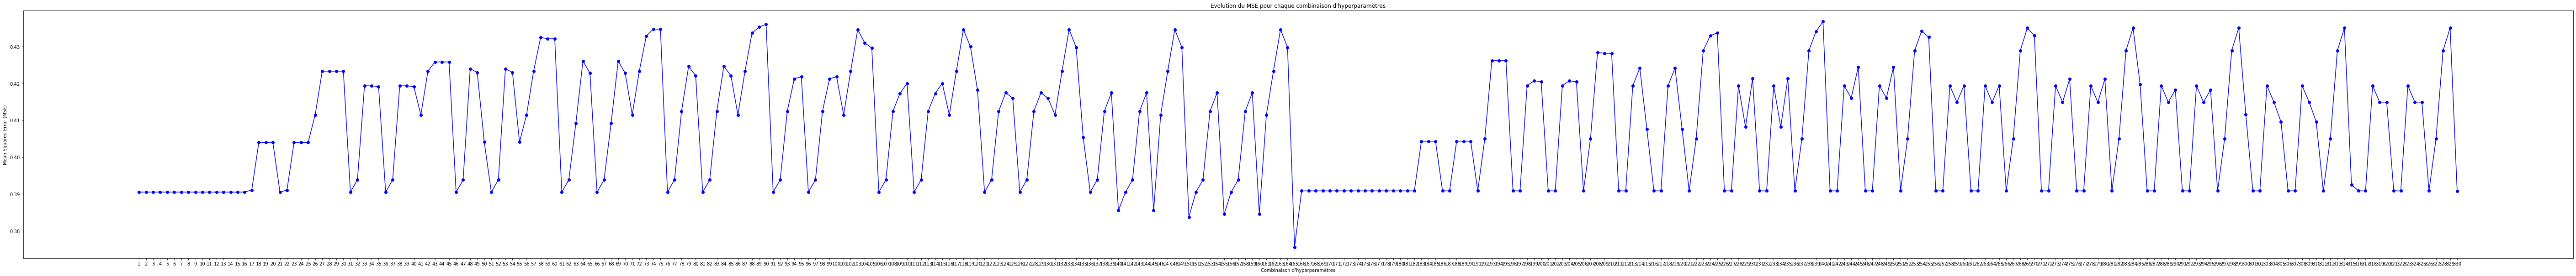

In [690]:
# Obtenez les résultats du GridSearchCV
results = grid_search.cv_results_

# Examinez les différentes métriques disponibles
print(results.keys())

# Obtenez les scores MSE moyens pour chaque combinaison d'hyperparamètres
mean_test_scores = results['mean_test_score']

# Tracer l'évolution du MSE
plt.figure(figsize=(100, 10))
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', linestyle='-', color='b')
plt.xticks(range(len(mean_test_scores)), np.arange(1, len(mean_test_scores) + 1))
plt.title('Evolution du MSE pour chaque combinaison d\'hyperparamètres')
plt.xlabel('Combinaison d\'hyperparamètres')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

In [691]:
from sklearn.ensemble import RandomForestRegressor

# Création du modèle de régression de forêt aléatoire
rf_model_shares = RandomForestRegressor()

# Définir les hyperparamètres à tester
param_grid_rf_shares = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instancier le Grid Search model
grid_search_rf_shares = GridSearchCV(rf_model_shares, param_grid_rf_shares, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Adapter le Grid Search au modèle
grid_search_rf_shares.fit(x_train_df, y_train['shares'])

# Meilleur modèle
best_rf_shares = grid_search_rf_shares.best_estimator_

# Prédiction et évaluation
y_pred_rf_shares = best_rf_shares.predict(x_test_df)
mse_rf_shares = mean_squared_error(y_test['shares'], y_pred_rf_shares)
r2_rf_shares = r2_score(y_test['shares'], y_pred_rf_shares)



print("Random Forest Regressor - Best Parameters:", grid_search_rf_shares.best_params_)
print("Random Forest Regressor - Mean Squared Error:", mse_rf_shares)
print("Random Forest Regressor - R^2 Score:", r2_rf_shares)



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Random Forest Regressor - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Regressor - Mean Squared Error: 9104061.946441049
Random Forest Regressor - R^2 Score: 0.06305274702670038


# matrice de confusion pour gradientboosting

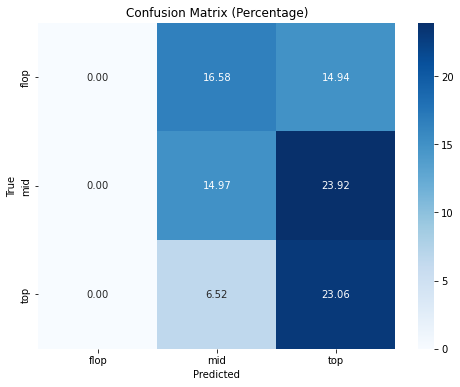

In [692]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir les valeurs prédites en catégories
y_pred_category = pd.cut(y_pred_gb, bins=[-float('inf'), 1000, 2200, float('inf')], labels=[0, 1, 2])

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test['categorize_encoded'], y_pred_category)

# Calculer le nombre total d'échantillons
total_samples = conf_matrix.sum()

# Convertir chaque élément de la matrice de confusion en pourcentage
conf_matrix_percentage = (conf_matrix / total_samples) * 100

# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['flop', 'mid', 'top'], yticklabels=['flop', 'mid', 'top'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Decision tree classifier, confusion matrix

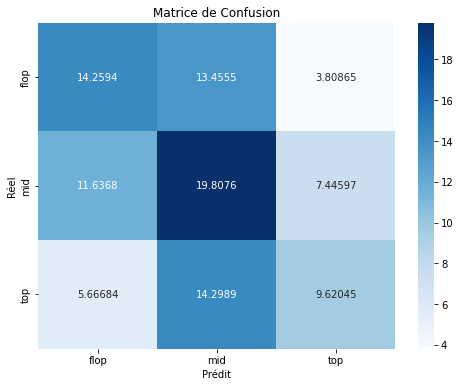

In [693]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédiction et évaluation avec le meilleur modèle
y_pred = best_tree.predict(x_test_df)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test['categorize_encoded'], y_pred)
conf_matrix_percentage = (conf_matrix / total_samples) * 100
# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='g', cmap='Blues', xticklabels=['flop', 'mid', 'top'], yticklabels=['flop', 'mid', 'top'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


In [746]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(random_state=42)

# Entraînement du modèle
model.fit(x_train_df, y_train['categorize_encoded'])

# Prédiction sur l'ensemble de test
y_pred = model.predict(x_test_df)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test['categorize_encoded'], y_pred)
r2_lr=r2_score(y_test['categorize_encoded'], y_pred)
mse_lr=mean_squared_error(y_test['categorize_encoded'], y_pred)
# Rapport de classification
report = classification_report(y_test['categorize_encoded'], y_pred)

# Affichage des résultats
print(f"Accuracy: {accuracy}")
print(f"MSE: {mse_lr}")
print(f"R²: {r2_lr}")

Accuracy: 0.41552451238798105
MSE: 0.7829467580390089
R²: -0.2820036385562745


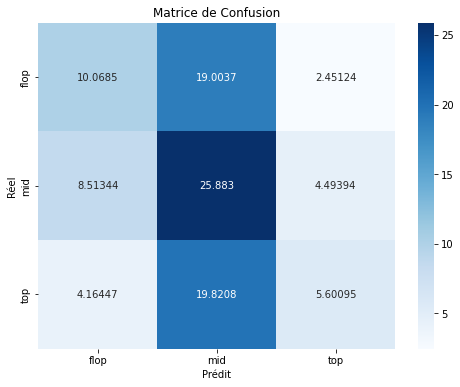

In [695]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédiction et évaluation avec le meilleur modèle
y_pred = model.predict(x_test_df)

# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test['categorize_encoded'], y_pred)
conf_matrix_percentage = (conf_matrix / total_samples) * 100
# Afficher la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='g', cmap='Blues', xticklabels=['flop', 'mid', 'top'], yticklabels=['flop', 'mid', 'top'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()